# 설문조사 응답 분석1 - 데이터 사이언스, 어떤 사람들이 할까요?

**참고 URL :**  

* https://www.kaggle.com/rounakbanik/data-science-faq - Data Science FAQ | Kaggle
* https://www.kaggle.com/ash316/novice-to-grandmaster - Novice to Grandmaster | Kaggle  
* 캐글을 시작한지 두 달정도 된 초보자로, 이 설문조사의 결과를 바탕으로 데이터사이언스와 머신러닝과 관련 된 인사이트를 얻어볼 수 있지 않을까 가설을 세워본다.

# 캐글러를 대상으로 한 설문조사 
* 설문기간 : 2017년 08월 7일 부터 8월 25일 까지
* 평균 응답 시간은 16.4 분 
* 171개 국가 및 지역에서 16,716명의 응답자 
* 특정 국가 또는 지역에서 응답자가 50명 미만인 경우 익명을 위해 그룹을 '기타'그룹으로 그룹화 
* 설문조사 시스템에 신고 된 응답자를 스팸으로 분류하거나 취업 상태에 관한 질문에 답변하지 않은 응답자는 제외(이 질문은 첫번째 필수 질문이기에 응답하지 않으면 응답자가 다섯번 째 질문 이후 진행되지 않음)
* 대부분의 응답자는 이메일 목록, 토론 포럼 및 소셜미디어 Kaggle 채널을 통해 설문을 알게 됨 
* 급여데이터는 일부 통화에 대해서만 받고 해당되는 통화에 기준하여 작성하도록 함 
* 미국 달러로 급여를 계산할 수 있도롯 USD로 환산한 csv를 제공 
* 잘문은 선택적
* 모든 질문이 모든 응답자에게 보여지는것은 아님 
* 취업을 한 사람과 학생을 나느어 다른 질문을 함 
* 응답자의 신원을 보장하기 위해 주관식과 객관식 파일로 분리 
* 객관식과 자유형식 응답을 맞추기 위한 키를 제공하지 않음 
* 주관식 응답은 같은 행에 나타나는 응답이 반드시 동일한 설문 조사자가 제공하지 않도록 열 단위로 무작위 지정 


# 데이터 파일 

5 개의 데이터 파일을 제공

* schema.csv : 설문 스키마가있는 CSV 파일입니다. 이 스키마에는 multipleChoiceResponses.csv 및 freeformResponses.csv의 각 열 이름에 해당하는 질문이 포함되어 있습니다.
* multipleChoiceResponses.csv : 객관식 및 순위 질문에 대한 응답자의 답변, 각 행이 한 응답자의 응답
* freeformResponses.csv : Kaggle의 설문 조사 질문에 대한 응답자의 주관식 답변입니다. 임의로 지정되어 각 행이 같은 응답자를 나타내지 않음
* conversionRates.csv : R 패키지 "quantmod"에서 2017 년 9 월 14 일에 액세스 한 통화 변환율 (USD)
* RespondentTypeREADME.txt : schema.csv 파일의 "Asked"열에 응답을 디코딩하는 스키마입니다.

# 분석 준비 

## 필수 라이브러리 호출

In [1]:
# 노트북 안에서 그래프를 그리기 위해
%matplotlib inline

# Import the standard Python Scientific Libraries
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# Suppress Deprecation and Incorrect Usage Warnings 
import warnings
warnings.filterwarnings('ignore')

In [2]:
#구글 드라이브 연동하기
#구글 드라이브에 데이터를 올린 후 사용할 경우에만 실행
#from google.colab import drive
#drive.mount('/content/drive')

## 데이터 파일 로드 

### 데이터 스키마 

In [3]:
question = pd.read_csv("data_sets//kaggle_survey_2017/\schema.csv")
question.shape

(290, 3)

In [4]:
question.head()

,Column,Question,Asked
0,GenderSelect,Select your gender identity. - Selected Choice,All
1,GenderFreeForm,Select your gender identity. - A different ide...,All
2,Country,Select the country you currently live in.,All
3,Age,What's your age?,All
4,EmploymentStatus,What's your current employment status?,All


In [5]:
question.tail()

,Column,Question,Asked
285,JobFactorRemote,How are you assessing potential job opportunit...,Learners
286,JobFactorIndustry,How are you assessing potential job opportunit...,Learners
287,JobFactorLeaderReputation,How are you assessing potential job opportunit...,Learners
288,JobFactorDiversity,How are you assessing potential job opportunit...,Learners
289,JobFactorPublishingOpportunity,How are you assessing potential job opportunit...,Learners


### 데이터 파일 로드2 - 객관식 데이터
* 실질적인 데이터중 하나인 객관식 문제에 대한 응답을 로드합니다. 

In [6]:
# 판다스로 선다형 객관식 문제에 대한 응답을 가져옴 
mcq = pd.read_csv("data_sets/\kaggle_survey_2017/\multipleChoiceResponses.csv", encoding="ISO-8859-1",low_memory=False)

mcq.shape

(16716, 228)

In [7]:
mcq.columns

Index(['GenderSelect', 'Country', 'Age', 'EmploymentStatus', 'StudentStatus',
       'LearningDataScience', 'CodeWriter', 'CareerSwitcher',
       'CurrentJobTitleSelect', 'TitleFit',
       ...
       'JobFactorExperienceLevel', 'JobFactorDepartment', 'JobFactorTitle',
       'JobFactorCompanyFunding', 'JobFactorImpact', 'JobFactorRemote',
       'JobFactorIndustry', 'JobFactorLeaderReputation', 'JobFactorDiversity',
       'JobFactorPublishingOpportunity'],
      dtype='object', length=228)

In [8]:
mcq.tail()

,GenderSelect,Country,Age,EmploymentStatus,StudentStatus,LearningDataScience,CodeWriter,CareerSwitcher,CurrentJobTitleSelect,TitleFit,...,JobFactorExperienceLevel,JobFactorDepartment,JobFactorTitle,JobFactorCompanyFunding,JobFactorImpact,JobFactorRemote,JobFactorIndustry,JobFactorLeaderReputation,JobFactorDiversity,JobFactorPublishingOpportunity
16711,Female,Other,24.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16712,Male,Indonesia,25.0,Employed full-time,NaN,NaN,Yes,NaN,Programmer,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16713,Female,Taiwan,25.0,Employed part-time,NaN,NaN,No,Yes,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16714,Female,Singapore,16.0,I prefer not to say,Yes,"Yes, but data science is a small part of what ...",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16715,Male,Japan,27.0,Employed full-time,NaN,NaN,No,Yes,Programmer,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
mcq.isna().sum()

GenderSelect                         95
Country                             121
Age                                 331
EmploymentStatus                      0
StudentStatus                     15436
                                  ...  
JobFactorRemote                   13292
JobFactorIndustry                 13307
JobFactorLeaderReputation         13315
JobFactorDiversity                13306
JobFactorPublishingOpportunity    13292
Length: 228, dtype: int64

<AxesSubplot:>

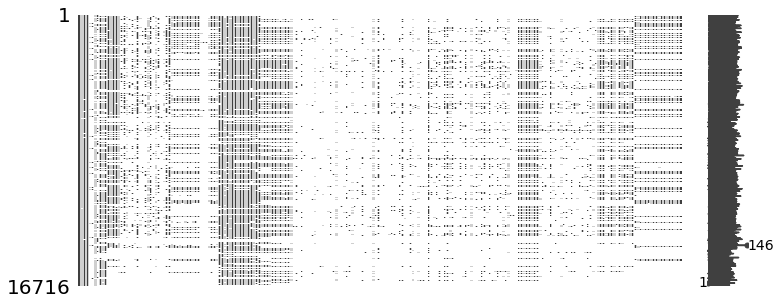

In [10]:
#  missingno는 NaN 대이터들에 대해 시각화를 해준다. 
# NaN 데이터의 컬럼이 많아 아래 그래프만으로는 내용을 파악하기 어렵다.
import missingno as msno

msno.matrix(mcq, figsize = (12,5))

* 16,716 명의 데이터와 228개의 선다형 객관식문제와 62개의 주관식 질문에 대한 응답이다. (총 290개의 질문) 응답하지 않은 질문이 많음

# 설문 통계 

## 성별

<AxesSubplot:xlabel='count', ylabel='GenderSelect'>

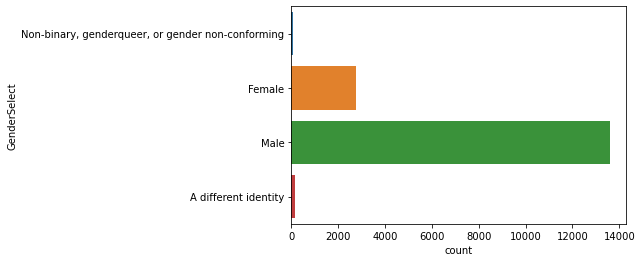

In [11]:
# 성별 통계 정보 확인 
sns.countplot(y="GenderSelect", data=mcq)

## 국적

In [12]:
# 국가별 응답수 
con_df = pd.DataFrame(mcq["Country"].value_counts())
# print(con_df)

# contry 컬럼을 인덱스로 지정하고 
con_df["국가"] = con_df.index
#con_df
# 컬럼의 순서대로 응답수, 국가로 컬럼명을 지정해 줌 
con_df.columns = ["응답수", "국가"]
#con_df

# 나라이름(country)으로 설정되어 있는 index 콜롬울 삭제하고 순위를 알기 위해 reset_index() 를 해준다. 
# 우리나라는 18위 이고 전체 52국에서 참여했지마느 20위 까지만 본다. 
con_df = con_df.reset_index().drop('index', axis=1)
con_df.head(20)

,응답수,국가
0,4197,United States
1,2704,India
2,1023,Other
3,578,Russia
4,535,United Kingdom
5,471,People 's Republic of China
6,465,Brazil
7,460,Germany
8,442,France
9,440,Canada


## 연령

In [13]:
# 연령에 대한 정보를 본다. 
mcq["Age"].describe()

count    16385.000000
mean        32.372841
std         10.473487
min          0.000000
25%         25.000000
50%         30.000000
75%         37.000000
max        100.000000
Name: Age, dtype: float64

<AxesSubplot:xlabel='Age', ylabel='Density'>

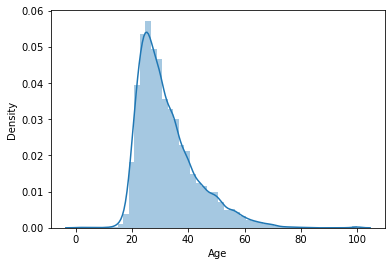

In [14]:
# distplot 을 이용해 mcq에서 나이가 0세 이상인 사람들을 대상으로 AGE열의 정보만을 시각화합니다.
sns.distplot(mcq[mcq["Age"]>0]["Age"])

**응답자의 대부분이 어리며, 20대부터 급격히 늘어나며, 30대가 가장 많다. 평균 나이는 32세다.**

## 학력 

<AxesSubplot:xlabel='count', ylabel='FormalEducation'>

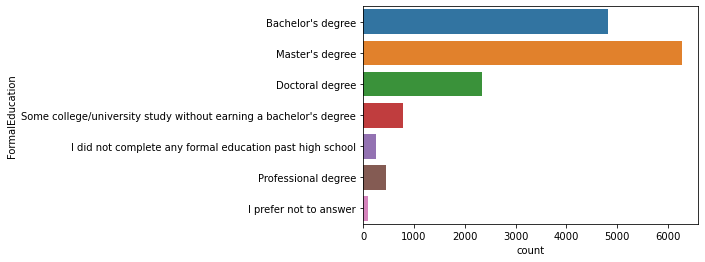

In [15]:
sns.countplot(y="FormalEducation", data=mcq)

학사 학위를 가진 사람보다 석사 학위를 가지고 있는 사람이 많으며, 박사학위를 가지고 있는 사람들도 많다.

## 전공

In [16]:
# value_counts 를 사용하면 그룹화된 데이터의 카운트 값을 보여준다. 
# normalize = T 옵션 이용 --> 해당 데이터가 전체 데이터에서 차지하는 비율을 보여줌 
mcq_major_count = pd.DataFrame(mcq["MajorSelect"].value_counts())
mcq_major_percent = pd.DataFrame(mcq["MajorSelect"].value_counts(normalize=True))

# 두개의 데이터프레임을 하나로 통합합니다. 
    # 이때, 두개의 인덱스를 모두 표시합니다. 
mcq_major_df = mcq_major_count.merge(mcq_major_percent,
                                    left_index = True, 
                                    right_index = True)
# mcq_major_df.head()

# 인덱스 이름을 설정합니다. 
mcq_major_df.columns = ["응답수", "비율"]
mcq_major_df

,응답수,비율
Computer Science,4397,0.331074
Mathematics or statistics,2220,0.167156
Engineering (non-computer focused),1339,0.100821
Electrical Engineering,1303,0.098110
Other,848,0.063851
Physics,830,0.062495
"Information technology, networking, or system administration",693,0.052180
A social science,531,0.039982
Biology,274,0.020631
Management information systems,237,0.017845


컴퓨터 전공자들이 33%로 가장 많으며, 다음으로 수학, 공학, 전기 공학 순이다.

<AxesSubplot:xlabel='count', ylabel='MajorSelect'>

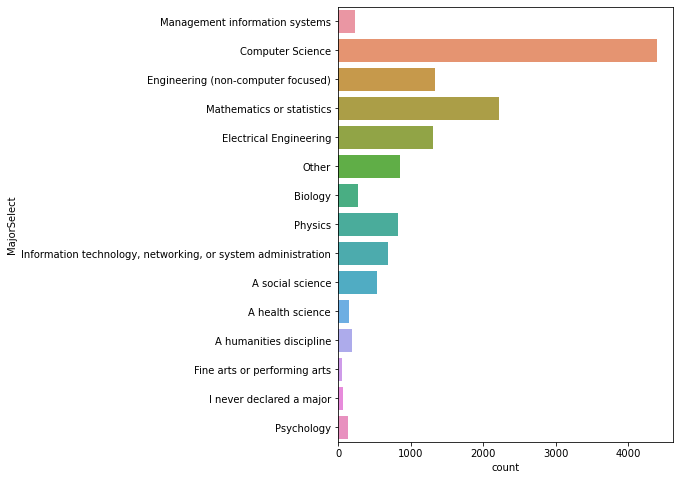

In [17]:
# 재학중인 사람들의 전공 현황 
plt.figure(figsize=(6,8))
sns.countplot(y = "MajorSelect", data=mcq)

## 취업여부 

In [18]:
# 빈도
mcq_es_count = pd.DataFrame(
    mcq['EmploymentStatus'].value_counts())
# 비율
mcq_es_percent = pd.DataFrame(
    mcq['EmploymentStatus'].value_counts(normalize=True))
# 위의 두 데이터 프레임 병합
mcq_es_df = mcq_es_count.merge(
    mcq_es_percent, left_index=True, right_index=True)
# 인덱스 이름 재설정 
mcq_es_df.columns = ['응답 수', '비율']
mcq_es_df

,응답 수,비율
Employed full-time,10897,0.651890
"Not employed, but looking for work",2110,0.126226
"Independent contractor, freelancer, or self-employed",1330,0.079564
"Not employed, and not looking for work",924,0.055276
Employed part-time,917,0.054858
I prefer not to say,420,0.025126
Retired,118,0.007059


<AxesSubplot:xlabel='count', ylabel='EmploymentStatus'>

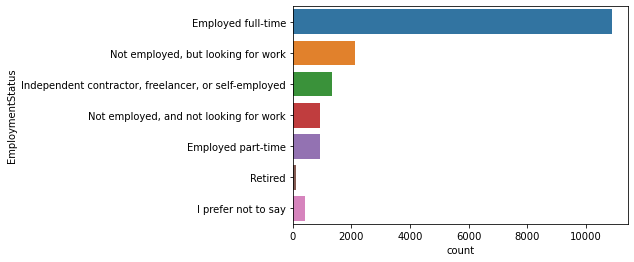

In [19]:
sns.countplot(y="EmploymentStatus", data=mcq)

## 프로그래밍 경험 

* Tenure'항목은 데이터사이언스 분야에서 코딩 경험이 얼마나 되는지에 대한 질문이다. 대부분이 5년 미만이며, 특히 1~2년의 경험을 가진 사람들이 많다.


<AxesSubplot:xlabel='count', ylabel='Tenure'>

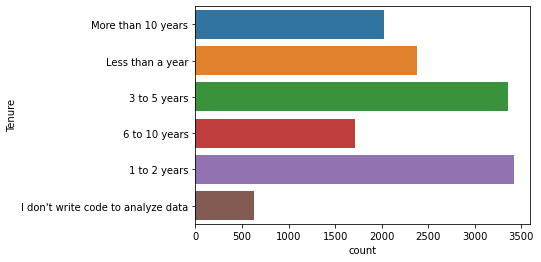

In [20]:
sns.countplot(y="Tenure", data=mcq)

## 한국의 경우

한국의 피인터뷰자의 수 : 194


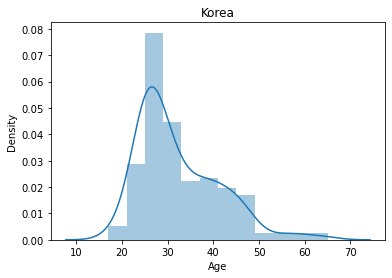

In [21]:
# 우리나라의 경우만 따로 파악합니다. 

korea = mcq.loc[mcq["Country"] == "South Korea"]
# korea.head()
print("한국의 피인터뷰자의 수 : " + str(korea.shape[0]))
#korea.shape

# 결측치를 제외한, 응답자의 연령을 살펴봅니다. 
sns.distplot(korea["Age"].dropna())
# 대분류 제목 생성
plt.title("Korea")
plt.show() # 활성화

In [22]:
# 한국의 응답자의 성비를 봅니다.
pd.DataFrame(korea["GenderSelect"].value_counts())

,GenderSelect
Male,156
Female,37
A different identity,1


Text(0.5, 1.0, 'korean')

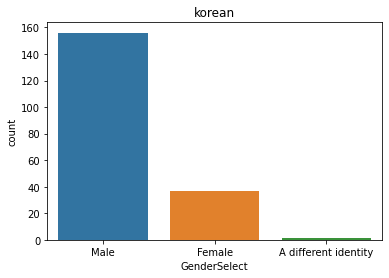

In [23]:
# 그래프로 성별을 시각화 합니다. 
sns.countplot(data=korea, x="GenderSelect")
plt.title("korean")

Text(0.5, 1.0, 'korean Male')

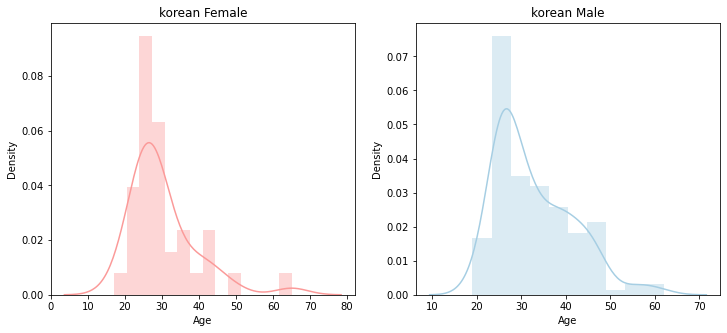

In [24]:
# 성별별로 연령을 동시에 시각화 합니다. 
# 1. 그룹화 환경 생성
figure, (ax1,ax2) = plt.subplots(ncols=2) # 전체그룹명 figure -> 하위 그래프 ax1과 ax2 컬럼 수(그래프의 가로 표시 갯수)
# 2. 사이즈 지정 
figure.set_size_inches(12,5)

# 3. 들어갈 각각의 그래프 정보 입력 

#여성
sns.distplot(korea["Age"].loc[korea["GenderSelect"]=="Female"].dropna(),
            norm_hist=False, color= sns.color_palette("Paired")[4], ax=ax1)
#plt.title("korean Female")
ax1.set_title("korean Female")

# 남성
sns.distplot(korea["Age"].loc[korea["GenderSelect"]=="Male"].dropna(),
            norm_hist=False, color= sns.color_palette("Paired")[0], ax=ax2)
ax2.set_title("korean Male")
#plt.title("korean male")

# 위의 서브플롯에 대한 자세한 설명 포스팅
# https://blog.naver.com/PostView.nhn?blogId=zzz90zzz&logNo=221791516068

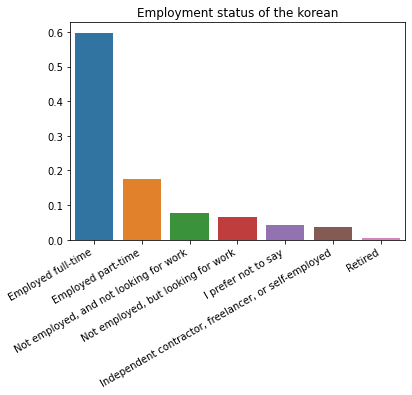

In [25]:
# 우리나라 응답자의 직업 비중을 찾아봅시다. 
sns.barplot(x=korea["EmploymentStatus"].unique(), y=korea["EmploymentStatus"].value_counts()/len(korea)) # 전체중 비중으로 표현하기 위해 전체한국인으로 나눔
plt.xticks(rotation=30, ha='right') # ha 옵션은 글자 정렬 옵션임 
plt.title('Employment status of the korean')
plt.ylabel('')
plt.show() # 명시적으로 그래프 호출

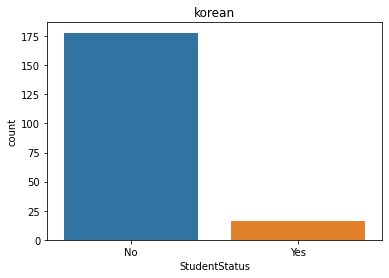

In [26]:
# na를 no라는 별도의 값으로 만들어 시각화를 더욱 보기 좋게 합니다. 
korea['StudentStatus'] = korea['StudentStatus'].fillna('No')
sns.countplot(x='StudentStatus', data=korea)
plt.title('korean')
plt.show()

In [27]:
full_time = mcq.loc[(mcq['EmploymentStatus'] == 'Employed full-time')]
print(full_time.shape)
looking_for_job = mcq.loc[(
    mcq['EmploymentStatus'] == 'Not employed, but looking for work')]
print(looking_for_job.shape)

(10897, 228)
(2110, 228)


# 자주 묻는 질문 FAQ 
* 데이터를 기반으로 초보자들이 묻는 가장 일반적인 질문에 대한 답을 시각화 해 본다. 


## Q1. Python과 R 중 어떤 언어를 배워야 할까요?

<AxesSubplot:xlabel='count', ylabel='LanguageRecommendationSelect'>

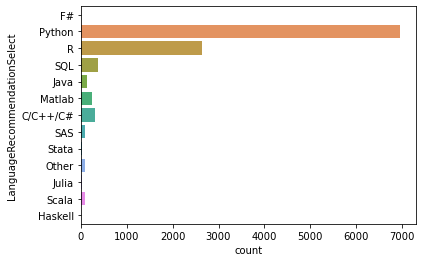

In [28]:
sns.countplot(y="LanguageRecommendationSelect", data=mcq)

파이썬을 명확하게 선호하고 있는것으로 보여지며, 전문가와 강사들이 선호하는 언어를 알아보자. 

<AxesSubplot:xlabel='count', ylabel='CurrentJobTitleSelect'>

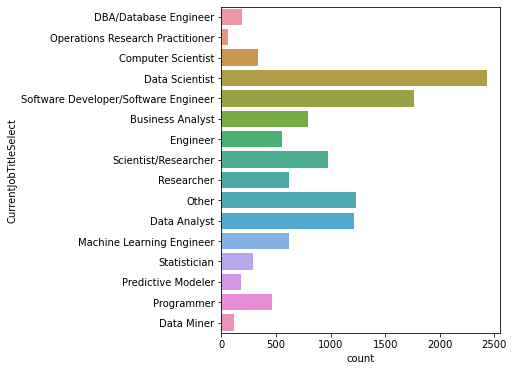

In [29]:
# 응답자 중, 현재 하고있는 일을 기준으로 인원을 시각화 합니다. 
plt.figure(figsize=(5,6))
sns.countplot(y=mcq["CurrentJobTitleSelect"])

In [30]:
# 현재 하고 있는 일에 대한 전체 응답 수 
mcq[mcq["CurrentJobTitleSelect"].notnull()]["CurrentJobTitleSelect"].shape

(11830,)

(7158, 228)


<AxesSubplot:xlabel='count', ylabel='CurrentJobTitleSelect'>

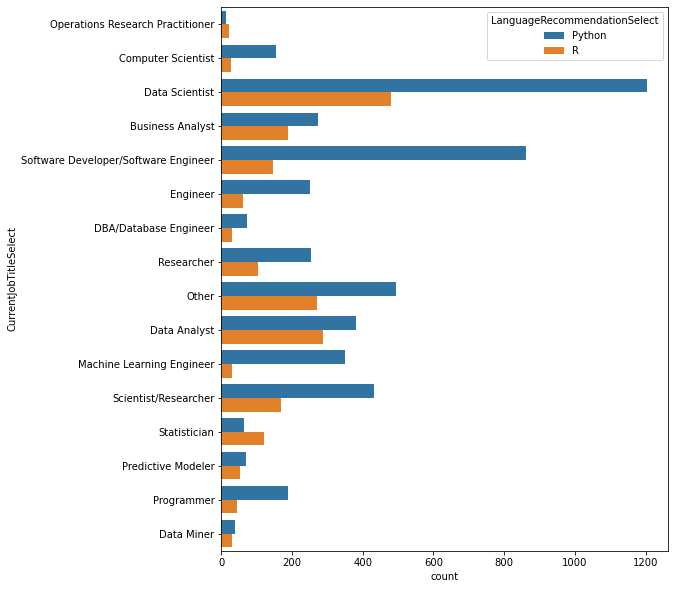

In [31]:
# 현재 하고있는 일에 대한 응답을 해준 사람중 python과 R 을 이용하는 사람 
# 응답자들이 실제 업무에서 어떤 언어를 주로 사용하는지를 볼 수 있다. 

# 데이터를 따로 담는 작업을 할꼬에요~~ , 
# 각 업무 답변이 널값이 아닌 사람들 중에, 파이썬 혹은 알을 쓰는 응답자만 데이터에 담을꼬에윰!! 
data = mcq[(mcq["CurrentJobTitleSelect"].notnull()) &
          ((mcq["LanguageRecommendationSelect"] == "Python") | (mcq["LanguageRecommendationSelect"] == "R") )]
# data.head() ##성공! 
print(data.shape)

# 시각화 
plt.figure(figsize=(8,10))
sns.countplot(data=data,
              y="CurrentJobTitleSelect",
             hue="LanguageRecommendationSelect")

데이터사이언티스트들은 Python을 주로 사용하지만 R을 사용하는 사람들도 제법 된다. 하지만 소프트웨어 개발자들은 Python을 훨씬 더 많이 사용하며, Python보다 R을 더 많이 사용하는 직업군은 통계 학자들이다.

## Q2. 데이터 사이언스 분야에서 앞으로 크게 주목받을 것은 무엇일까요?
  
  
* 관련 분야의 종사자가 아니더라도 빅데이터, 딥러닝, 뉴럴네트워크 같은 용어에 대해 알고 있다. 응답자들이 내년에 가장 흥미로운 기술이 될 것이라 응답한 것이다.

### 데이터사이언스 툴

In [32]:
# mcq['MLToolNextYearSelect'].value_counts()
#pd.DataFrame(mcq['MLToolNextYearSelect'].value_counts())

In [33]:
# 머신러닝 도구 중, 가장 자주 사용되는 툴을 보자! 

# 툴을 비율별, 빈도별로 카운트 후, 
mcq_ml_tool_count = pd.DataFrame(
    mcq['MLToolNextYearSelect'].value_counts())
mcq_ml_tool_percent = pd.DataFrame(
    mcq['MLToolNextYearSelect'].value_counts(normalize=True))
# 두개의 데이터 프레임을 합병해 하나로 본다.
mcq_ml_tool_df = mcq_ml_tool_count.merge(
    mcq_ml_tool_percent, left_index=True, right_index=True).head(20)
# 컬럼의 이름을 다시 설정해주면 끝! 
mcq_ml_tool_df.columns = ['응답 수', '비율']
mcq_ml_tool_df

,응답 수,비율
TensorFlow,2621,0.238316
Python,1713,0.155756
R,910,0.082742
Spark / MLlib,755,0.068649
Hadoop/Hive/Pig,417,0.037916
Other,407,0.037007
Amazon Machine Learning,392,0.035643
Jupyter notebooks,358,0.032551
I don't plan on learning a new tool/technology,341,0.031006
Google Cloud Compute,296,0.026914


<AxesSubplot:xlabel='MLToolNextYearSelect'>

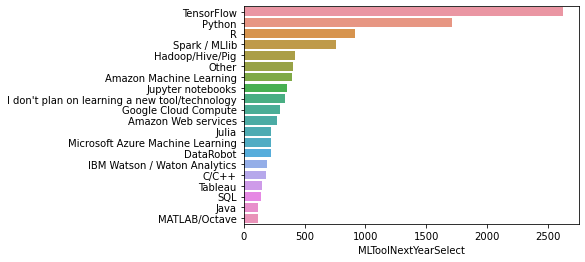

In [34]:
# 위의 자료를 시각적으로 표현해 봅시다. 
data = mcq["MLToolNextYearSelect"].value_counts().head(20)
sns.barplot(y=data.index , x= data)

구글의 딥러닝 프레임워크 텐서플로우가 23%로 가장 많은 관심을 받을 것이라 응답했다. 그리고 Python이 15%, R은 8% 로 따르고 있다.

클라우드는 Amazon ML, GCP, AWS, MS Azure ML, IBM Watson 순으로 응답되었다.

### 다음 해에 주목할 만한 Data Science Methods

<AxesSubplot:xlabel='MLMethodNextYearSelect'>

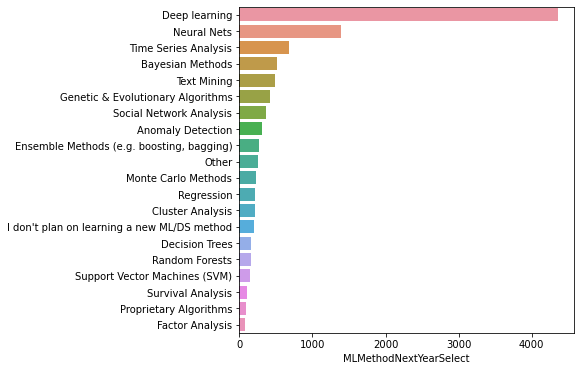

In [35]:
data = mcq["MLMethodNextYearSelect"].value_counts().head(20)
plt.figure(figsize=(6,6))
sns.barplot(y=data.index, x = data)

응답에 대한 통계를 보면 딥러닝과 뉴럴넷이 엄청나게 인기가 있을 것이고 시계열 분석, 베이지안, 텍스트 마이닝 등의 내용이 있다. 중간 쯤에 부스팅과 배깅 같은 앙상블 메소드도 있다.

## Q3. 어디에서 데이터 사이언스를 배워야 할까요?

In [36]:
# mcq["LearningPlatformSelect"] 보면, 콤마로 구분지어 여러개의 답변이 있음을 알 수 있다 .
# 콤마를 기준으로 분할 후, 타입을 object에서 string으로 변환 후 다시 담아준다. 
mcq["LearningPlatformSelect"] = mcq["LearningPlatformSelect"].astype('str').apply(lambda x : x.split(','))
#mcq["LearningPlatformSelect"].head()
# apply 함수 설명 : https://issactoast.com/53
# 어플라이 함수는 기존에 정의된 함수를 대상에 손쉽게 적용하기 위한 메소드이다. 
# 여기에서는 학습플렛폼에 있는 데이터를 문자열로 전환하고, 콤마를 기준으로 분할하여 하나의 array로 담아 배치하기 위해 사용함

# 이제 학습플렛폼에 대한 정보만을 제어한다. 
s = mcq.apply(
    lambda x: pd.Series(x['LearningPlatformSelect']),
    axis=1).stack().reset_index(level=1, drop=True)
# mcq를 제어해 배열을 만든다. -> 기준 함수는 : 러닝플렛폼에 있는 개별 항목을 꺼내주는 함수 
# -> 열을 기준으로 추출(1) -> stack()은 뭔지 모르겠지만, 스텍자료구조를 활용해 추출한다는것 같음
# -> 담긴 데이터프레임의 인덱스를 초기화하고, 기존의 인덱스는 제거한다.
# https://nittaku.tistory.com/122
s.name = 'platform'
# print(s)



https://datamod.tistory.com/133

<AxesSubplot:xlabel='platform'>

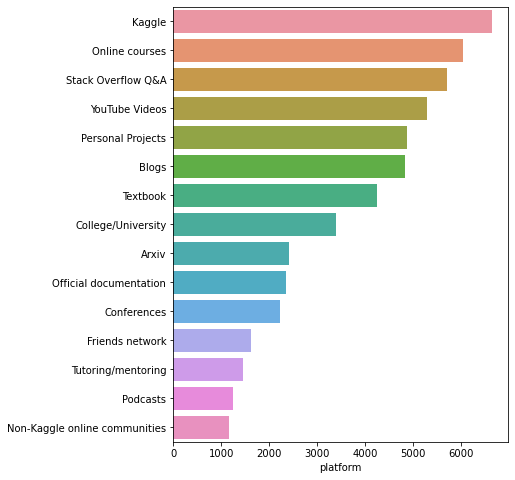

In [37]:
plt.figure(figsize=(6,8))
data = s[s != 'nan'].value_counts().head(15)
sns.barplot(y=data.index, x=data)

* Kaggle은 우리 응답자들 사이에서 가장 인기있는 학습 플랫폼
* 그러나 이 설문 조사를 실시한 곳이 Kaggle이기 때문에 응답이 편향되었을 수 있음
* 온라인 코스, 스택 오버플로 및 유튜브 (YouTube) 상위 5 대 최우수 학습 플랫폼은 대학 학위나 교과서의 중요도보다 높다.

In [38]:
# 설문내용과 누구에게 물어봤는지 찾아봄 
qc = question.loc[question["Column"].str.contains("LearningCategory")]
print(qc.shape)
qc

(7, 3)


,Column,Question,Asked
91,LearningCategorySelftTaught,What percentage of your current machine learni...,All
92,LearningCategoryOnlineCourses,What percentage of your current machine learni...,All
93,LearningCategoryWork,What percentage of your current machine learni...,All
94,LearningCategoryUniversity,What percentage of your current machine learni...,All
95,LearningCategoryKaggle,What percentage of your current machine learni...,All
96,LearningCategoryOther,What percentage of your current machine learni...,All
97,LearningCategoryOtherFreeForm,What percentage of your current machine learni...,All


In [39]:
use_features = [x for x in mcq.columns if x.find(
    'LearningPlatformUsefulness') != -1]

<AxesSubplot:>

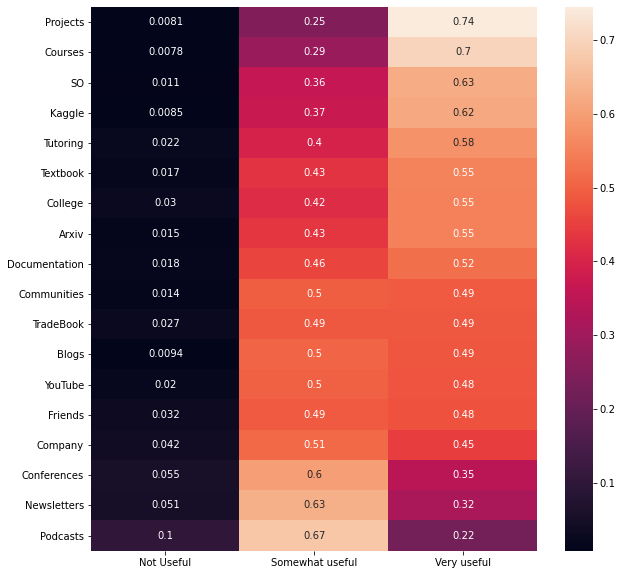

In [40]:
# 학습플랫폼과 유용함에 대한 연관성을 살펴본다.
fdf = {}
for feature in use_features:
    a = mcq[feature].value_counts()
    a = a/a.sum()
    fdf[feature[len('LearningPlatformUsefulness'):]] = a
# 딕셔너리 항목 추가 방법 :
# 딕셔너리_이름[key값] = value 
# 여기서 key로 들어간 값은 문자열 슬라이싱을 한것임 
# ex) "LearningPlatformUsefulnessConferences"[len("LearningPlatformUsefulness"):]
#     --> 러닝플렛폼뒤의 문자열만을 가져옴 --> "Conferences" 
fdf = pd.DataFrame(fdf).transpose().sort_values(
    'Very useful', ascending=False)

# 학습플랫폼들이 얼마나 유용한지에 대한 상관관계를 그려본다.
plt.figure(figsize=(10,10))
sns.heatmap(
    fdf.sort_values(
        "Very useful", ascending=False), annot=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, 'Projects'),
  Text(1, 0, 'Courses'),
  Text(2, 0, 'SO'),
  Text(3, 0, 'Kaggle'),
  Text(4, 0, 'Tutoring'),
  Text(5, 0, 'Textbook'),
  Text(6, 0, 'College'),
  Text(7, 0, 'Arxiv'),
  Text(8, 0, 'Documentation'),
  Text(9, 0, 'Communities'),
  Text(10, 0, 'TradeBook'),
  Text(11, 0, 'Blogs'),
  Text(12, 0, 'YouTube'),
  Text(13, 0, 'Friends'),
  Text(14, 0, 'Company'),
  Text(15, 0, 'Conferences'),
  Text(16, 0, 'Newsletters'),
  Text(17, 0, 'Podcasts')])

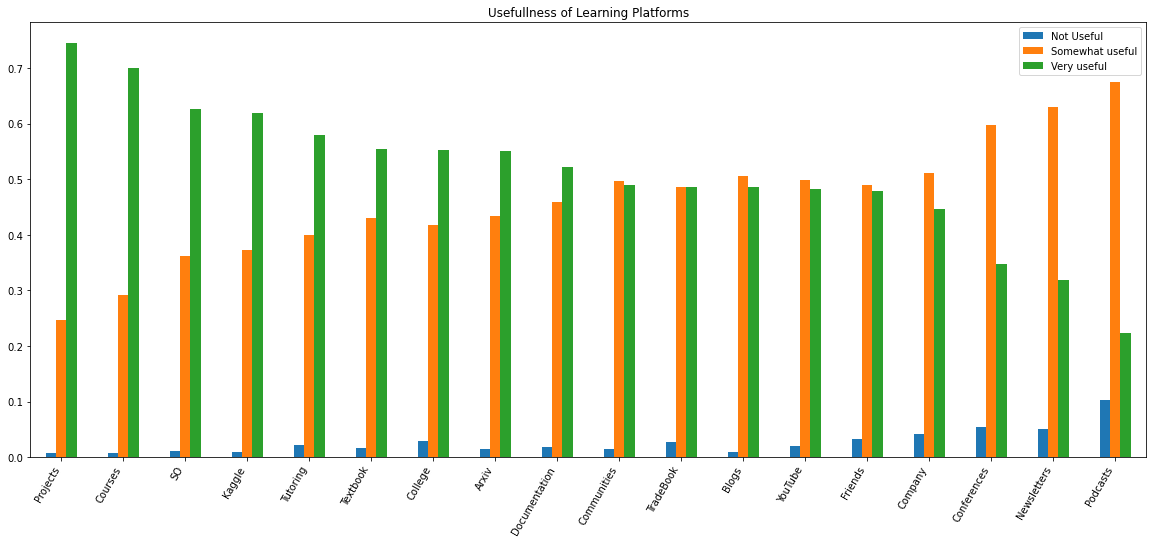

In [41]:
# 유용함의 정도를 각 플랫폼별로 그룹화 해서 본다.
fdf.plot(kind='bar', figsize=(20,8),
         title="Usefullness of Learning Platforms")
plt.xticks(rotation=60, ha='right')

실제로 프로젝트를 해보는 것에 대해 74.7%의 응답자가 응답했고 매우 유용하다고 표시했다. SO는 스택오버플로우가 아닐까 싶고, 캐글, 수업, 책이 도움이 많이되는 편이다. 팟캐스트는 매우 유용하지 않지만 때때로 유용하다는 응답은 가장 많았다.

In [42]:
# 각 플렛폼이 도움이 학습에서 도움이 된 비중을 시각화 해볼거당! 
# 일단 우선적으로 'LearningCategory' 가 포함된 컬럼명을 가져와 본다! 
cat_features = [x for x in mcq.columns if x.find(
    'LearningCategory') != -1]
# mcq의 컬럼명에서 러닝카테고리가 포함된 항목을 가져와 배열에 담는다. 
cat_features

['LearningCategorySelftTaught',
 'LearningCategoryOnlineCourses',
 'LearningCategoryWork',
 'LearningCategoryUniversity',
 'LearningCategoryKaggle',
 'LearningCategoryOther']

In [43]:
cdf = {}
for feature in cat_features:
    cdf[feature[len('LearningCategory'):]] = mcq[feature].mean()

# 파이차트를 그리기 위해 평균 값을 구해와서 담아준다.
cdf = pd.Series(cdf)
cdf

SelftTaught      33.366771
OnlineCourses    27.375514
Work             15.217593
University       16.988607
Kaggle            5.531434
Other             1.795940
dtype: float64

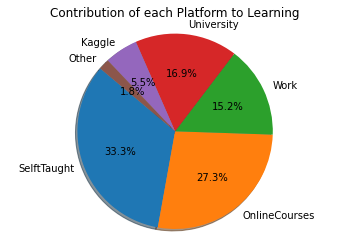

In [44]:
# 학습 플랫폼 별 도움이 되는 정도를 그려본다.
plt.pie(cdf, labels=cdf.index, 
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title("Contribution of each Platform to Learning")
plt.show()

개인프로젝트를 해보는 것이 가장 많은 도움이 되었으며, 온라인코스와 대학, 업무 그 다음으로 캐글을 통해 배웠다고 응답되었다.

## Q4. 데이터과학을 위해 높은 사양의 컴퓨터가 필요한가요?

In [45]:
# 설문내용과 누구에게 물어봤는지를 찾아봄
qc = question.loc[question[
    'Column'].str.contains('HardwarePersonalProjectsSelect')]
print(qc.shape)
qc

(1, 3)


,Column,Question,Asked
74,HardwarePersonalProjectsSelect,Which computing hardware do you use for your p...,Learners


In [46]:
mcq[mcq['HardwarePersonalProjectsSelect'].notnull()][
    'HardwarePersonalProjectsSelect'].shape

(4206,)

In [47]:
mcq[mcq['HardwarePersonalProjectsSelect'].notnull()][
    'HardwarePersonalProjectsSelect']

2                                   Basic laptop (Macbook)
7        Basic laptop (Macbook),Gaming Laptop (Laptop +...
10       Laptop or Workstation and local IT supported s...
12          Basic laptop (Macbook),Traditional Workstation
18                                  Basic laptop (Macbook)
                               ...                        
16547                               Basic laptop (Macbook)
16643            Gaming Laptop (Laptop + CUDA capable GPU)
16664    Laptop + Cloud service (AWS, Azure, GCE ...),T...
16681            Gaming Laptop (Laptop + CUDA capable GPU)
16704    Laptop or Workstation and local IT supported s...
Name: HardwarePersonalProjectsSelect, Length: 4206, dtype: object

In [48]:
# 위의 데이터를 보면 타입이 객체고, 일부는 여러가지 답변이 리스트형으로 들어있기도 함 
# 문자열 타입으로 변환 --> 분할 과정--> 리스트 형식으로 변함 
mcq['HardwarePersonalProjectsSelect'
   ] = mcq['HardwarePersonalProjectsSelect'
          ].astype('str').apply(lambda x: x.split(','))

# 리스트에서 하나씩 꺼내 별도의 시리즈형 데이터로 만들어줌 
# 이후, 인덱스를 한명 기준으로 카운트 
s = mcq.apply(lambda x: 
              pd.Series(x['HardwarePersonalProjectsSelect']),
              axis=1).stack().reset_index(level=1, drop=True)
# 이름 바꿔주기 
s.name = 'hardware'

In [49]:
# nan 항목 제거 
s = s[s != 'nan']

In [50]:
# 각항목의 빈도를 보여줌 
pd.DataFrame(s.value_counts())

,hardware
Basic laptop (Macbook),2246
Azure,669
GCE ...),669
Laptop + Cloud service (AWS,669
Gaming Laptop (Laptop + CUDA capable GPU),641
Traditional Workstation,527
Laptop or Workstation and local IT supported servers,445
GPU accelerated Workstation,416
Workstation + Cloud service,174
Other,147


맥북을 사용하는 응답자가 가장많고, 랩탑과 함께 클라우드를 사용하는 사람들이 그 다음이고 적당한 GPU를 가진 게임용 노트북을 사용하는 사례가 그 다음이다.

## Q5. 데이터 사이언스 공부에 얼마나 많은 시간을 사용하는지?

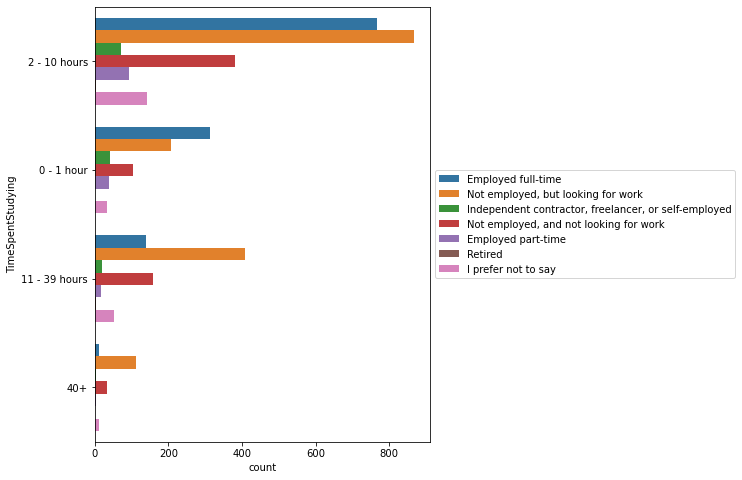

In [51]:
plt.figure(figsize=(6, 8))
sns.countplot(y='TimeSpentStudying', 
              data=mcq, 
              hue='EmploymentStatus'
             ).legend(loc='center left',
                      bbox_to_anchor=(1, 0.5))

풀타임으로 일하는 사람들은 2~10시간 일하는 비율이 높으며, 풀타임으로 일하는 사람보다 일을 찾고 있는 사람들이 더 많은 시간을 공부하는 편이다.

하지만 응답자 중 대부분이 풀타임으로 일하고 있는 사람들이라는 것을 고려할 필요가 있다.

In [52]:
full_time = mcq.loc[(mcq['EmploymentStatus'] == 'Employed full-time')]
print(full_time.shape)
looking_for_job = mcq.loc[(
    mcq['EmploymentStatus'] == 'Not employed, but looking for work')]
print(looking_for_job.shape)

(10897, 228)
(2110, 228)


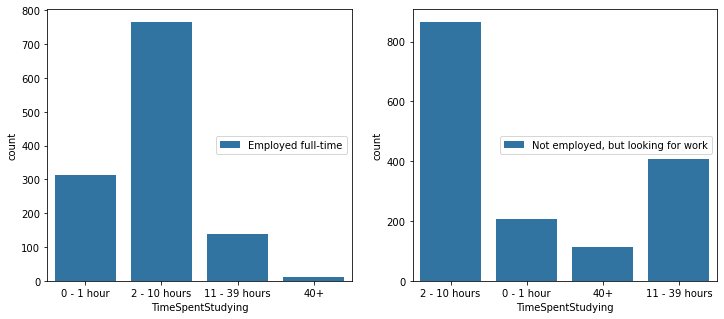

In [53]:
figure, (ax1, ax2) = plt.subplots(ncols=2)

figure.set_size_inches(12,5)
sns.countplot(x='TimeSpentStudying', 
              data=full_time, 
              hue='EmploymentStatus', ax=ax1
             ).legend(loc='center right',
                      bbox_to_anchor=(1, 0.5))

sns.countplot(x='TimeSpentStudying', 
              data=looking_for_job, 
              hue='EmploymentStatus', ax=ax2
             ).legend(loc='center right',
                      bbox_to_anchor=(1, 0.5))

## Q.6 블로그, 팟케스트, 수업, 기타 등등 추천할만한 것이 있는지?

* 설문 항목중 하나인 "BlogsPodcastsNewslettersSelect" 에서 개개인이 추천한 학습 페이지 정보를 정제해 순위별로 나타내 봅니다. 

In [54]:
# BlogPodccastsNewsSelect 에는 여러가지 선택항목이 ,로 구분지어져 있으며
# 데이터 타입은 object형이다. 
mcq["BlogsPodcastsNewslettersSelect"] = mcq["BlogsPodcastsNewslettersSelect"].astype("str").apply(lambda x : x.split(","))

mcq["BlogsPodcastsNewslettersSelect"].head(6)

0    [Becoming a Data Scientist Podcast, Data Machi...
1    [Becoming a Data Scientist Podcast, Siraj Rava...
2    [FastML Blog, No Free Hunch Blog, Talking Mach...
3                                     [KDnuggets Blog]
4    [Data Machina Newsletter, Jack's Import AI New...
5    [Other (Separate different answers with semico...
Name: BlogsPodcastsNewslettersSelect, dtype: object

In [55]:
# 한 항목에 여러가지 값들이 담겨 있음 
# 이를 분리하여 다시 담은 후 
s = mcq.apply(lambda x : pd.Series(x["BlogsPodcastsNewslettersSelect"]),
              axis=1).stack().reset_index(level =1, drop = True)
# mcq 내부의 "BlogsPodcastsNewslettersSelect" 컬럼을 시리즈형으로 받아와
# -> 스텍 자료구조를 통해 하나씩 꺼낸 후 -> a: 배열로 전환 
# -> 인덱스 level 0 와 level1 중 level1을 날려버린다. 
s.name = "Platforms"
# 이름 설정 

s.head(20)

0                    Becoming a Data Scientist Podcast
0                              Data Machina Newsletter
0                             O'Reilly Data Newsletter
0                         Partially Derivative Podcast
0                           R Bloggers Blog Aggregator
1                    Becoming a Data Scientist Podcast
1                          Siraj Raval YouTube Channel
2                                          FastML Blog
2                                   No Free Hunch Blog
2                             Talking Machines Podcast
3                                       KDnuggets Blog
4                              Data Machina Newsletter
4                          Jack's Import AI Newsletter
4                             O'Reilly Data Newsletter
5    Other (Separate different answers with semicolon)
6                                                  nan
7                    Becoming a Data Scientist Podcast
7                          Siraj Raval YouTube Channel
7         

In [56]:
# 가장 빈도가 높은 (많이 선택받은) 항목을 상위 20개만 추려본다.
s = s[s != "nan"].value_counts().head(20)
# s중 nan이 아닌것들에 대해 -> 빈도 개산후 -> 상위 20개만 표현
s

KDnuggets Blog                                       2650
R Bloggers Blog Aggregator                           2046
O'Reilly Data Newsletter                             1604
Becoming a Data Scientist Podcast                    1299
Other (Separate different answers with semicolon)    1296
No Free Hunch Blog                                   1238
Siraj Raval YouTube Channel                          1040
FastML Blog                                           729
 Causal Inference                                     662
Statistical Modeling                                  662
 and Social Science Blog (Andrew Gelman)              662
Data Machina Newsletter                               660
The Data Skeptic Podcast                              567
Talking Machines Podcast                              473
Data Elixir Newsletter                                447
FlowingData Blog                                      392
Linear Digressions Podcast                            369
Data Stories P

<AxesSubplot:title={'center':'most popular Blogs and Podcasts for studying data Science!'}, xlabel='Platforms'>

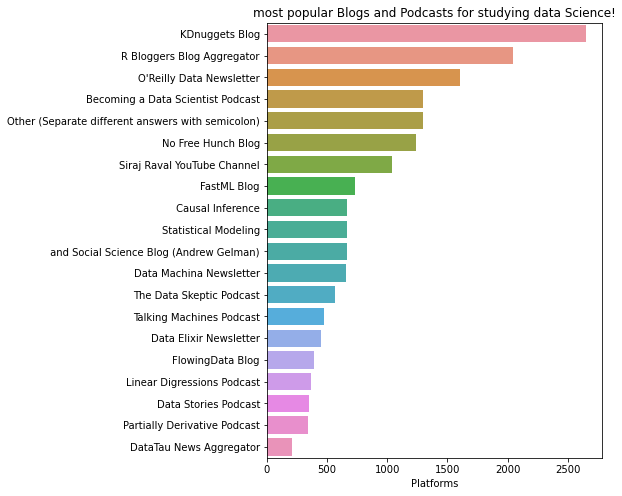

In [57]:
plt.figure(figsize=(6,8))
plt.title("most popular Blogs and Podcasts for studying data Science!")
sns.barplot(y=s.index, x =s)

KDNuggets Blog, R Bloggers Blog Aggregator 그리고 O'Reilly Data Newsletter 가 가장 유용하다고 투표를 받았다. 데이터 사이언스 되기라는 팟캐스트도 유명한 듯 하다.

* Machine Learning, Data Science, Big Data, Analytics  
https://www.kdnuggets.com/
* Becoming a Data Scientist - YouTube - YouTube  
https://www.youtube.com/channel/UCfxnrdBM1YRV9j2MB8aiy4Q
* Siraj Raval - YouTube - YouTube  
https://www.youtube.com/channel/UCWN3xxRkmTPmbKwht9FuE5A

### 인기있는 코스 플렛폼 

In [58]:
mcq["CoursePlatformSelect"].head(10)
# 결측치도 상당수 존재하며, 한 항목당 여러가지 항목이 들어가 있음을 볼 수 있다. 
# 또한 데이터 타입도 object 임을 알 수 있다. 

0             NaN
1             NaN
2    Coursera,edX
3             NaN
4             NaN
5             NaN
6             NaN
7        Coursera
8             NaN
9             NaN
Name: CoursePlatformSelect, dtype: object

In [59]:
# 우선 콤마를 기준으로 갈라서 배열(array --> "a"pply) 형태로 다시 넣어준다. 
mcq["CoursePlatformSelect"] = mcq["CoursePlatformSelect"].astype('str'
                               ).apply(lambda x :x.split(","))

print("각 항목의 데이터 타입은 " + str(type(mcq["CoursePlatformSelect"][2])) + "입니다.")

mcq["CoursePlatformSelect"].head()

# 하지만, 여전히 한 행에 리스트형으로 여러가지 자료가 들어 있다. 

각 항목의 데이터 타입은 <class 'list'>입니다.


0              [nan]
1              [nan]
2    [Coursera, edX]
3              [nan]
4              [nan]
Name: CoursePlatformSelect, dtype: object

In [60]:
# 하나씩 꺼내서 행당 하나의 자료만을 갖는 개별 시리즈를 만들것임 
# t = mcq.apply(lambda x : pd.Series(x["CoursePlatformSelect"]),axis=1).stack().reset_index(level=1, drop = True)

# 코드의 이해를 위해 "구분동작"으로 살펴보자 
t = mcq.apply(lambda x : pd.Series(x["CoursePlatformSelect"]),axis=1)
# 여기까지 하면, 각 행에 하나씩 들어 있지만 16717 * 5 의 구조로 표현된다. 


t = t.stack()# 스텍 구조에 담았다가 꺼냄. -->  18654 * 1 의 개별항목을 모두 하나의 행으로 인식하는 구조를 만듬 
# 그런데 인덱스가 두개임 
# 하나는 새로 만들어진 행을 기준으로 하나의 번호를 카운트 하는 인덱스 
# 나머지 하나는 기존의 행을 기준으로 번호를 부여하는 
# 따라서 새로운 인덱스는 빼고 보자 

t = t.reset_index(level=1, drop = True)
t.head(20)

# 문제는 결측치(nan)가 너무 많다 

0          nan
1          nan
2     Coursera
2          edX
3          nan
4          nan
5          nan
6          nan
7     Coursera
8          nan
9          nan
10    Coursera
11         nan
12    Coursera
12    DataCamp
12         edX
13         nan
14         nan
15         nan
16         nan
dtype: object

In [61]:
# 일단 결측치를 제거하고 -> 각각의 빈도수를 찾아본다. 
# t = t[t != 'nan'].value_counts()

# 구분동작 
t = t[t != 'nan']
t.head()

t = t.value_counts()
t

Coursera    1725
Udacity      805
edX          710
DataCamp     638
Other        356
dtype: int64

<AxesSubplot:title={'center':'Most Popular Course Platform'}>

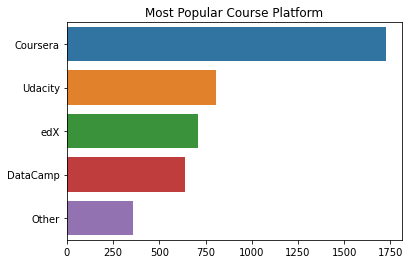

In [62]:
# 구한 빈도수를 가지고 시각화를 합니다. 
# 시각화 도구는 seaborn의 barplot(막대그래프)를 활용합니다. 
plt.title("Most Popular Course Platform")
sns.barplot(y=t.index, x = t)

Coursera 의 앤드류 응 교수의 강의가 유명하다넹

## Q7. 데이터 사이언스 직무에서 가장 중요하다고 생각되는 스킬은? 

* 해당 질문과 관련된 인덱스는 "JobSkillImportance~" 이다. 

In [63]:
# JobSkillimportance를 포함하는 컬럼명을 가진 컬럼은 많다 

# for x in mcq.columns:
#     if x.find("JobSkillImportance") != -1:
#         print(x)
# 위 코드는 아래와 같음 

print([x for x in mcq.columns if x.find("JobSkillImportance") != -1] ) 


# 이중, JobSkillImportanceOtherSelect1 , JobSkillImportanceOtherSelect2, JobSkillImportanceOtherSelect3
# 은 우리의 분석과 맞지 않는 자료들이다. 

['JobSkillImportanceBigData', 'JobSkillImportanceDegree', 'JobSkillImportanceStats', 'JobSkillImportanceEnterpriseTools', 'JobSkillImportancePython', 'JobSkillImportanceR', 'JobSkillImportanceSQL', 'JobSkillImportanceKaggleRanking', 'JobSkillImportanceMOOC', 'JobSkillImportanceVisualizations', 'JobSkillImportanceOtherSelect1', 'JobSkillImportanceOtherSelect2', 'JobSkillImportanceOtherSelect3']


In [64]:
# 따라서, 위에서 확인한 컬럼들만 불러와 job_features라는 변수에 컬럼명을 담는다. 
job_features = [x for x in mcq.columns if x.find(
    "JobSkillImportance") != -1 and x.find("JobSkillImportanceOther") == -1]
job_features

['JobSkillImportanceBigData',
 'JobSkillImportanceDegree',
 'JobSkillImportanceStats',
 'JobSkillImportanceEnterpriseTools',
 'JobSkillImportancePython',
 'JobSkillImportanceR',
 'JobSkillImportanceSQL',
 'JobSkillImportanceKaggleRanking',
 'JobSkillImportanceMOOC',
 'JobSkillImportanceVisualizations']

In [65]:
# 우선 각 항목의 자료가 어떻게 들어가 있는지 보자 
mcq["JobSkillImportanceR"].head(20)

# 결과는 결측치/Necessary/ UnNeccesary/Nice to have 등의 척도로 개인마다 하나의 답변으로 정해져 있음 
# 따라서 각 컬럼이 어떤 평가를 평균적으로 받았는지 통계를 내어 비교할 필요가 있다. 


0              NaN
1              NaN
2        Necessary
3              NaN
4              NaN
5              NaN
6              NaN
7     Nice to have
8              NaN
9              NaN
10     Unnecessary
11             NaN
12       Necessary
13             NaN
14             NaN
15             NaN
16             NaN
17             NaN
18       Necessary
19    Nice to have
Name: JobSkillImportanceR, dtype: object

In [66]:
# 우선 각 컬럼이 여러개의 평가를 받으므로 
# --> 딕셔너리형 구조를 이용해 -> 각각의 평가의 비율을 담아야 한다. 
jdf = {}
for feature in job_features: 
    a = mcq[feature].value_counts() # 1. 각 컬럼에서의 평가 빈도를 구하고
    a = a/a.sum()  # 2. 구한 빈도(결측치x)를 결측치를 제외한 전체 빈도로 나누어 
                   #     비율을 산출함 
    jdf[feature[len("JobSkillImportance"):]] = a
    # key 값으로 앞에 공통어를 뺀 나머지 단어를 쓰고, 값으로 a 를 각각 넣어줌

jdf

{'BigData': Nice to have    0.574065
 Necessary       0.379929
 Unnecessary     0.046006
 Name: JobSkillImportanceBigData, dtype: float64,
 'Degree': Nice to have    0.598107
 Necessary       0.279867
 Unnecessary     0.122026
 Name: JobSkillImportanceDegree, dtype: float64,
 'Stats': Necessary       0.513889
 Nice to have    0.457576
 Unnecessary     0.028535
 Name: JobSkillImportanceStats, dtype: float64,
 'EnterpriseTools': Nice to have    0.564970
 Unnecessary     0.290200
 Necessary       0.144829
 Name: JobSkillImportanceEnterpriseTools, dtype: float64,
 'Python': Necessary       0.645994
 Nice to have    0.327214
 Unnecessary     0.026792
 Name: JobSkillImportancePython, dtype: float64,
 'R': Nice to have    0.513945
 Necessary       0.414807
 Unnecessary     0.071247
 Name: JobSkillImportanceR, dtype: float64,
 'SQL': Nice to have    0.491778
 Necessary       0.434224
 Unnecessary     0.073998
 Name: JobSkillImportanceSQL, dtype: float64,
 'KaggleRanking': Nice to have    0.677

In [67]:
# 위의 데이터를 보기 좋게 데이터프레임화하고 
# 눈에 익숙하게 점수를 열로 준다. 

# jdf = pd.DataFrame(jdf).transpose()
jdf = pd.DataFrame(jdf)
#jdf 

jdf = jdf.transpose()
jdf

,Necessary,Nice to have,Unnecessary
BigData,0.379929,0.574065,0.046006
Degree,0.279867,0.598107,0.122026
Stats,0.513889,0.457576,0.028535
EnterpriseTools,0.144829,0.564970,0.290200
Python,0.645994,0.327214,0.026792
R,0.414807,0.513945,0.071247
SQL,0.434224,0.491778,0.073998
KaggleRanking,0.118863,0.677261,0.203876
MOOC,0.107255,0.606994,0.285752
Visualizations,0.455392,0.490820,0.053788


<AxesSubplot:>

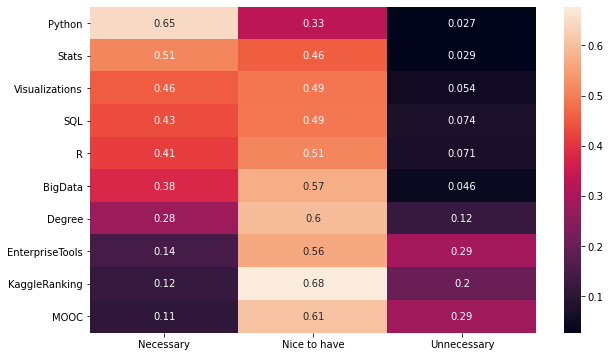

In [68]:
# 위의 자료를 보다 보기 좋게 시각화한다. 
# 시각화에는 heatMap을 사용할 예정 
# 그런데 히트맵은 특성상 정렬을 무조건 선행해야 한다. 

# jdf.sort_values("Necessary", ascending= False)

plt.figure(figsize=(10,6))
sns.heatmap(jdf.sort_values("Necessary", ascending= False), annot= True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'BigData'),
  Text(1, 0, 'Degree'),
  Text(2, 0, 'Stats'),
  Text(3, 0, 'EnterpriseTools'),
  Text(4, 0, 'Python'),
  Text(5, 0, 'R'),
  Text(6, 0, 'SQL'),
  Text(7, 0, 'KaggleRanking'),
  Text(8, 0, 'MOOC'),
  Text(9, 0, 'Visualizations')])

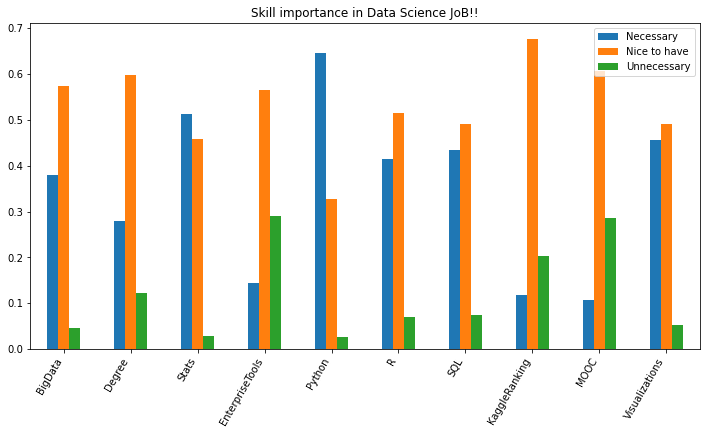

In [69]:
# 그런데, 히트맵은 사용법을 모르는 사람에게는 전달이 조금 어렵고 
# 눈에 직관적으로 들어오지 않는다. 
# 따라서 seaborn의 막대그래프(barplot)으로 시각화를 한번 더 해본다. 

jdf.plot(kind = 'bar' , figsize =(12,6),
        title = "Skill importance in Data Science JoB!!")
# x레이블들을 보기 좋게! 
plt.xticks(rotation = 60,ha = "right" )

## Q8. 데이터 과학자의 평균 급여는 얼마나 될까? 
* 보수(compensation)의 정보는 mcq의 "compensationAmount" 열에 담겨 있다.

In [70]:
# 우선 데이터의 모양좀 보자 
mcq["CompensationAmount"].head(20)
# 결측치가 많아 결측을 제외한 값을 한번 보자 

print(mcq.loc[mcq["CompensationAmount"].notnull()]["CompensationAmount"].shape)

mcq.loc[mcq["CompensationAmount"].notnull()]["CompensationAmount"].head(20)



(5224,)


3       250,000
8         80000
9       1200000
11       95,000
14      1100000
15      120,000
21        20000
22       100000
23        20000
25       624000
26        65000
27    156000000
28       150000
31       126000
32      130,000
34       133000
37        80000
42        30000
44        28000
45       200000
Name: CompensationAmount, dtype: object

In [71]:
# 데이터를 보면 ","와 "-" 등의 문자가 금액표시의 가독성을 위해 들어가 있음 
# 이는 처리시 장애가 될 수 있음으로 제거한다.

# 먼저 각 항목을 문자열로 인식 시켜주고 -> 이를 문자열의 "대체"함수인 
# replace 메소드를 활용하여 제거해준다.
mcq["CompensationAmount"] = mcq["CompensationAmount"].str.replace(",","")
mcq["CompensationAmount"] = mcq["CompensationAmount"].str.replace("-","")

mcq["CompensationAmount"].head(30)

0           NaN
1           NaN
2           NaN
3        250000
4           NaN
5           NaN
6           NaN
7           NaN
8         80000
9       1200000
10          NaN
11        95000
12          NaN
13          NaN
14      1100000
15       120000
16          NaN
17          NaN
18          NaN
19          NaN
20          NaN
21        20000
22       100000
23        20000
24          NaN
25       624000
26        65000
27    156000000
28       150000
29          NaN
Name: CompensationAmount, dtype: object

* 위의 자료에는 다양한 국적의 데이터 사이언티스트가 있다.  
* -> 따라서 환율을 적용하여 절대적인 가치를 구해야한다. 

* 이를 위해 : 해당분기 환율정보를 불러오고 -> 계산을 위한 데이터를 모두 포함하는 데이터 프레임을 설정 -> 계산  .. 의 과정을 거져야 한다. 

In [72]:
# 우선 환율 정보를 로드한다. 

rates = pd.read_csv("data_sets/\kaggle_survey_2017/\conversionRates.csv")
rates.head(20)
# 여기서, "Unnamed:0" 열은 사실 의미가 없다 
# 날리자! 

rates.drop("Unnamed: 0", axis=1, inplace=True)
print(rates.shape)
print(rates["originCountry"].unique())
rates.head(20)

# 중복 국가 없음 확인 
# 컬럼으로 국가명과 달러 환율이 있음 

(86, 2)
['USD' 'EUR' 'INR' 'GBP' 'BRL' 'RUB' 'CAD' 'AUD' 'JPY' 'CNY' 'PLN' 'SGD'
 'ZAR' 'CHF' 'MXN' 'TWD' 'COP' 'PKR' 'TRY' 'DKK' 'IDR' 'KRW' 'PHP' 'IRR'
 'SEK' 'HUF' 'NZD' 'CZK' 'ILS' 'ARS' 'HKD' 'NGN' 'NOK' 'CLP' 'MYR' 'AED'
 'KES' 'LKR' 'EGP' 'THB' 'UAH' 'ALL' 'RON' 'MAD' 'RSD' 'AMD' 'BDT' 'PEN'
 'UGX' 'VND' 'XOF' 'HRK' 'NPR' 'BGN' 'ETB' 'KZT' 'TND' 'AFN' 'BHD' 'BIF'
 'BSD' 'DOP' 'GTQ' 'IQD' 'SDG' 'TTD' 'VEF' 'AZN' 'BAM' 'BYN' 'CRC' 'CUP'
 'DZD' 'GHS' 'ISK' 'JOD' 'MGA' 'MUR' 'OMR' 'PAB' 'SAR' 'SVC' 'SZL' 'UYU'
 'XAF' 'YER']


,originCountry,exchangeRate
0,USD,1.000000
1,EUR,1.195826
2,INR,0.015620
3,GBP,1.324188
4,BRL,0.321350
5,RUB,0.017402
6,CAD,0.823688
7,AUD,0.802310
8,JPY,0.009108
9,CNY,0.153000


In [73]:
# 환율정보를 적용하여 계산하려면 여러가지 데이터가 동시에 필요함 
# 각 응답자의 국적, 실제로 받은 통화종류, 보수액 이 필요하며 
# 성별과 직업의 종류가 임금에 미치는 영향을 추후 분석하기 위해  데이터를 함께 받아두는게 좋다 

salary = mcq[["CompensationAmount","CompensationCurrency","GenderSelect",
             "Country","CurrentJobTitleSelect"]].dropna()
# 하나의 항목이라도 결측치가 있으면 계산때 곤란하기 때문에 잡아준다. 
salary.head(20)

,CompensationAmount,CompensationCurrency,GenderSelect,Country,CurrentJobTitleSelect
3,250000,USD,Male,United States,Operations Research Practitioner
8,80000,AUD,Female,Australia,Business Analyst
9,1200000,RUB,Male,Russia,Software Developer/Software Engineer
11,95000,INR,Male,India,Data Scientist
14,1100000,TWD,Male,Taiwan,Software Developer/Software Engineer
21,20000,USD,Male,United States,Researcher
22,100000,USD,Male,United States,Scientist/Researcher
23,20000,CZK,Male,Czech Republic,Other
25,624000,RUB,Male,Russia,Data Analyst
27,156000000,COP,Male,Colombia,Data Scientist


* pandas merge 함수 설명  -> 데이터프레임의 병합
https://yganalyst.github.io/data_handling/Pd_12/

In [74]:
# 이제 salary 데이터 프레임에 환율정보를 merge해준다. 
salary = salary.merge(rates,left_on="CompensationCurrency",right_on="originCountry", how="left")
salary
# merge의 데이터 표현 방식은 총 4가지가 있다. 
# 1. inner : 병합하는 두 데이터 프레임에 공통인 행이 없다면 제외하고 공동으로 갖는 자료만 갖는다. 
# 2, outer : 합집합의 개념 
# 3. left : 왼쪽에 있는 자료를 기준으로 왼쪽에 없는 데이터는 제외처리한다. 
#           따라서, left_on = 과 right_on = 을 통해 각각 키가 되는 열을 지정한다. 
# 4. right : 오른쪽을 기준으로! 방법은 left와 동일 

,CompensationAmount,CompensationCurrency,GenderSelect,Country,CurrentJobTitleSelect,originCountry,exchangeRate
0,250000,USD,Male,United States,Operations Research Practitioner,USD,1.000000
1,80000,AUD,Female,Australia,Business Analyst,AUD,0.802310
2,1200000,RUB,Male,Russia,Software Developer/Software Engineer,RUB,0.017402
3,95000,INR,Male,India,Data Scientist,INR,0.015620
4,1100000,TWD,Male,Taiwan,Software Developer/Software Engineer,TWD,0.033304
...,...,...,...,...,...,...,...
4362,50000,USD,Male,Other,DBA/Database Engineer,USD,1.000000
4363,84000,EUR,Male,Germany,Software Developer/Software Engineer,EUR,1.195826
4364,200000,USD,Male,United States,Data Scientist,USD,1.000000
4365,75000,EUR,Male,Norway,Data Analyst,EUR,1.195826


In [75]:
# 이제 실제 봉급 수령액을 환율 적용한 가치로 환산해 계산한다. 
# 데이터 프레임의 구조상 "받은통화" 와 동일한 화폐국을 대응시켰기 때문에 
# 이점을 활용 -> 데이터 프레임 내부에서 계산을 수행한다. 
salary["Salary"] = pd.to_numeric(salary["CompensationAmount"]) * salary["exchangeRate"]
# compensationAmount는 지금 숫자로 들어가 있지 않기 때문에 숫자로 변환하는 메소드로 감싸준다 .

salary.head(20)

,CompensationAmount,CompensationCurrency,GenderSelect,Country,CurrentJobTitleSelect,originCountry,exchangeRate,Salary
0,250000,USD,Male,United States,Operations Research Practitioner,USD,1.000000,250000.000
1,80000,AUD,Female,Australia,Business Analyst,AUD,0.802310,64184.800
2,1200000,RUB,Male,Russia,Software Developer/Software Engineer,RUB,0.017402,20882.400
3,95000,INR,Male,India,Data Scientist,INR,0.015620,1483.900
4,1100000,TWD,Male,Taiwan,Software Developer/Software Engineer,TWD,0.033304,36634.400
5,20000,USD,Male,United States,Researcher,USD,1.000000,20000.000
6,100000,USD,Male,United States,Scientist/Researcher,USD,1.000000,100000.000
7,20000,CZK,Male,Czech Republic,Other,CZK,0.045820,916.400
8,624000,RUB,Male,Russia,Data Analyst,RUB,0.017402,10858.848
9,156000000,COP,Male,Colombia,Data Scientist,COP,0.000342,53352.000


In [76]:
# 밑에서 어떻게 마이너스가 나오나?

# salary[salary["Salary"]>0]["Salary"]
# salary[salary["exchangeRate"]<0]
# salary[pd.to_numeric(salary["CompensationAmount"]) <0]

In [77]:
print("Maximum Salary of data Scientist is USD $", salary["Salary"].dropna().astype(int).max())
print("Minimum Salary of data Scientist is USD $", salary["Salary"].dropna().astype(int).min())
print("Median Salary of data Scientist is USD $", salary["Salary"].dropna().astype(int).median())


Maximum Salary of data Scientist is USD $ 208999999
Minimum Salary of data Scientist is USD $ -2147483648
Median Salary of data Scientist is USD $ 53812.0


가장 큰 수치는 여러 국가들의 GDP보다 크다고 한다. 가짜 응답이며, 평균급여는 USD $ 53,812 이다. 그래프를 좀 더 잘 표현하기 위해 50만불 이상의 데이터만 distplot으로 그려봤다.

Text(0.5, 1.0, 'Salary Distribution')

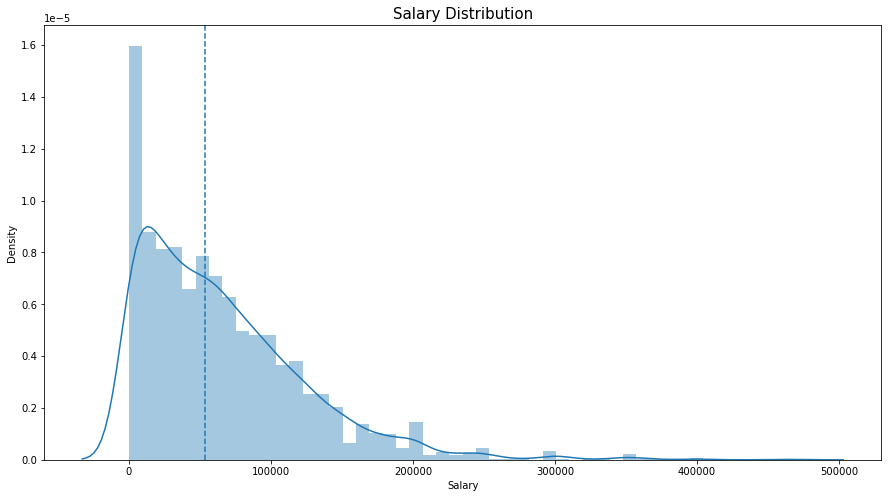

In [78]:
plt.subplots(figsize=(15,8))
salary=salary[salary['Salary']<500000]
sns.distplot(salary['Salary'])
plt.axvline(salary['Salary'].median(), linestyle='dashed') # 보조선 추가 옵션 --> 선은 median을 표현하도록 
plt.title('Salary Distribution',size=15)


Text(0.5, 1.0, 'Highest Salary Paying Countries')

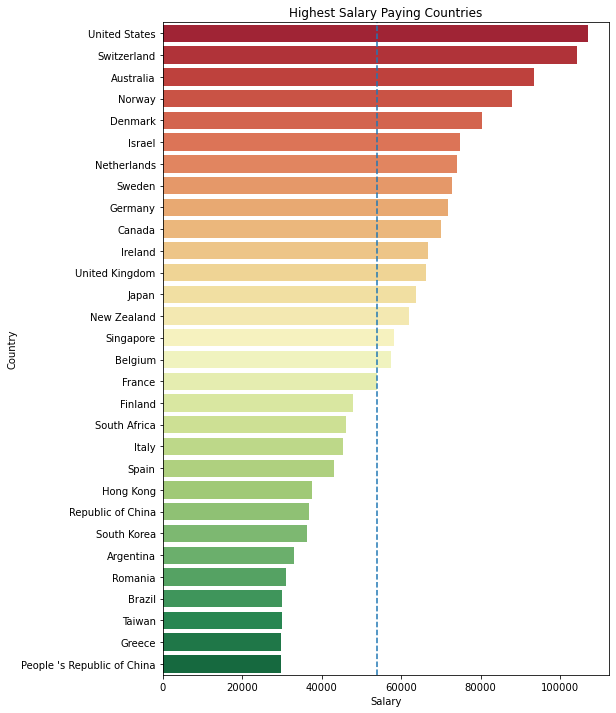

In [79]:
# 국가별 어느나라가 임금이 가장 높은지 

plt.subplots(figsize=(8,12))

sal_coun = salary.groupby(
    'Country')['Salary'].median().sort_values(
    ascending=False)[:30].to_frame()

sns.barplot('Salary', 
            sal_coun.index,
            data = sal_coun,
            palette='RdYlGn')

# 보조측 설정 
plt.axvline(salary['Salary'].median(), linestyle='dashed')
# 이름 설정
plt.title('Highest Salary Paying Countries')

<AxesSubplot:xlabel='Salary', ylabel='GenderSelect'>

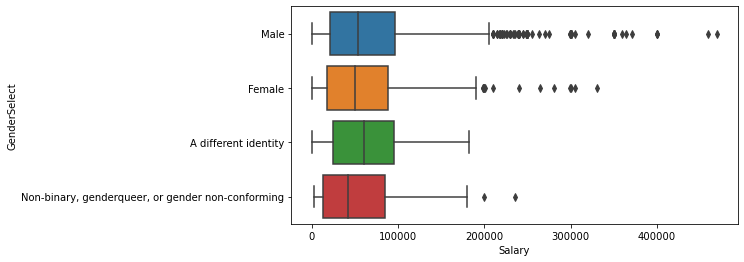

In [80]:
# 성별별로 임금격차를 살펴봅니다 
plt.subplots(figsize=(8,4))
sns.boxplot(y='GenderSelect',x='Salary', data=salary)

<AxesSubplot:xlabel='Salary', ylabel='GenderSelect'>

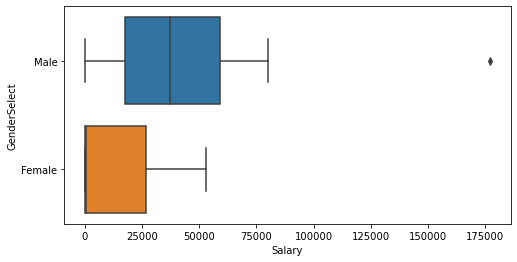

In [81]:
# 한국의 남녀 임금격차
salary_korea = salary.loc[(salary['Country']=='South Korea')]
plt.subplots(figsize=(8,4))
sns.boxplot(y='GenderSelect',x='Salary',data=salary_korea)

In [82]:
salary_korea.shape

(26, 8)

In [83]:
salary_korea[salary_korea['GenderSelect'] == 'Female']

# 응답자 수가 적고, 수치상 오류가 보여 일반화가 어렵다 

,CompensationAmount,CompensationCurrency,GenderSelect,Country,CurrentJobTitleSelect,originCountry,exchangeRate,Salary
479,30000,KRW,Female,South Korea,Data Analyst,KRW,0.000886,26.58
2903,800000,KRW,Female,South Korea,Researcher,KRW,0.000886,708.80
4063,60000000,KRW,Female,South Korea,Researcher,KRW,0.000886,53160.00


In [84]:
# 한국 남성 응답자의 급여 기술통계 
salary_korea_male = salary_korea[
    salary_korea['GenderSelect']== 'Male']
salary_korea_male['Salary'].describe()

count        23.000000
mean      43540.617217
std       37800.608484
min           0.886000
25%       17500.000000
50%       37212.000000
75%       59238.000000
max      177200.000000
Name: Salary, dtype: float64

## Q9. 개인프로젝트나 학습용 데이터를 어디에서 얻나요?

In [85]:
print(mcq["PublicDatasetsSelect"][0])

Dataset aggregator/platform (i.e. Socrata/Kaggle Datasets/data.world/etc.),University/Non-profit research group websites,Other


In [86]:
# 질문 중, 공공데이터셋에 대한 질문을 기반으로 답을 알아본다.
mcq['PublicDatasetsSelect'] = mcq['PublicDatasetsSelect'].astype('str').apply(
    lambda x: x.split(',')
    )
# 우선, 여러가지 답이 동시에 언급되는 셀이기 때문에 
# 내용을 콤마를 기준으로 나눠준다.

In [87]:
# 하지만, 여전히 배열의 형태로, 한 행에 여러 데이터가 들어있다. 
# 따라서, 내용을 추출해 하나의 행에 하나의 데이터만을 갖는 시리즈형 데이터를 만들어준다. 

q = mcq.apply(
    lambda x: pd.Series(x['PublicDatasetsSelect']),
    axis=1).stack().reset_index(level=1, drop=True)

q.name = 'courses'


In [88]:
# 이제 순위를 알아보기 위해 빈도를 측정해야 하는데 
# 결측치가 있기 때문에 이를 제외한 데이터에 대해 측정을 시도한다.
q = q[q != 'nan'].value_counts()
q
# 현재 데이터가 시리즈 형태로 나온다. 
# 데이터 프레임으로 시각화해보자 

Dataset aggregator/platform (i.e. Socrata/Kaggle Datasets/data.world/etc.)    6843
Google Search                                                                 3600
University/Non-profit research group websites                                 2873
I collect my own data (e.g. web-scraping)                                     2560
GitHub                                                                        2400
Government website                                                            2079
Other                                                                          399
Name: courses, dtype: int64

In [89]:
pd.DataFrame(q)

,courses
Dataset aggregator/platform (i.e. Socrata/Kaggle Datasets/data.world/etc.),6843
Google Search,3600
University/Non-profit research group websites,2873
I collect my own data (e.g. web-scraping),2560
GitHub,2400
Government website,2079
Other,399


<AxesSubplot:title={'center':'Most Popular Dataset Platforms'}, xlabel='courses'>

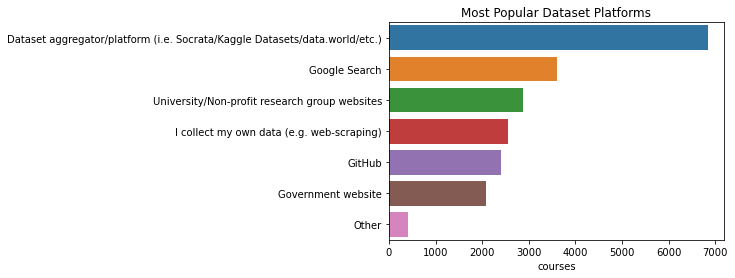

In [90]:
plt.title("Most Popular Dataset Platforms")
sns.barplot(y=q.index, x=q)

Kaggle 및 Socrata는 개인 프로젝트나 학습에 사용하기 위한 데이터를 얻는데 인기있는 플랫폼이다. Google 검색 및 대학 / 비영리 단체 웹 사이트는 각각 2위와 3위에 있다. 그리고 직접 웹스크래핑 등을 통해 데이터를 수집한다고 한 응답이 4위다.

### 주관식 응답에서 답을 찾아보자 

In [91]:
# 주관식 응답을 찾아온다 . 
ff = pd.read_csv("data_sets/kaggle_survey_2017/freeformResponses.csv",
                encoding ="ISO-8859-1", low_memory= False)
print(ff.shape) 
ff.head(20)

(16716, 62)


,GenderFreeForm,KaggleMotivationFreeForm,CurrentJobTitleFreeForm,MLToolNextYearFreeForm,MLMethodNextYearFreeForm,LanguageRecommendationFreeForm,PublicDatasetsFreeForm,PersonalProjectsChallengeFreeForm,LearningPlatformCommunityFreeForm,LearningPlatformFreeForm1,...,WorkMethodsFrequencySelect2FreeForm,WorkMethodsFrequencySelect3FreeForm,TimeOtherSelectFreeForm,WorkChallengesFreeForm,WorkChallengeFrequencyOtherFreeForm,WorkMLTeamSeatFreeForm,WorkDataStorageFreeForm,WorkCodeSharingFreeForm,SalaryChangeFreeForm,JobSearchResourceFreeForm
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Data manipulation,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I can't find time to practice consistently,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,teacher,NaN,NaN,NaN,NaN,NaN,NaN,Meetups,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Connectivity/data fusion,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,kdnuggets,Prepping data,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,Stanford SNAP,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,PyTorch,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [94]:
# 설문 내용과 누구에게 물어봤는지를 찾아본다. 
qc = question.loc[question["Column"].str.contains("PersonalProjectsChallengeFreeForm")]
print(qc.shape)
qc.Question.values[0]
# qc는 1행 짜리 데이터이지만 3개의 열을 갖는다 .
# 열의 이름 중 하나인 Question에 있는  데이터 중, 0번째를 꺼낸다. 
# Question에는 [질문내용과, 데이터 타입정보] 가 배열 형태로 답겨 있다. 
# 이중 데이터만 가져오겠다는 말이다. 

(1, 3)


'What is your biggest challenge with the public datasets you find for personal projects?'

#### 개인프로젝트에서 공개된 데이터셋을 다루는데 가장 어려운점은 무엇일까? 

In [102]:
# 해당 질문에 대한 데이터는 personalprojectchallengefreeform 에 있습니다. 
# 우선 데이터의 모습을 먼저 봅시다.
ff["PersonalProjectsChallengeFreeForm"].head(10)

0                             Data manipulation
1    I can't find time to practice consistently
2                                           NaN
3                      Connectivity/data fusion
4                                           NaN
5                                 Prepping data
6                                           NaN
7                                           NaN
8                                           NaN
9                                           NaN
Name: PersonalProjectsChallengeFreeForm, dtype: object

In [130]:
# 우선, 중첩되는 행이 없기 때문에 바로 빈도를 계산해봅니다.
ppcff = ff['PersonalProjectsChallengeFreeForm'].value_counts().head(15)
ppcff.name = '응답 수' # 데이터에 표시된느 이름 설정 
pd.DataFrame(ppcff)

,응답 수
None,23
Cleaning the data,20
Cleaning,20
Dirty data,16
Data Cleaning,14
none,13
Data cleaning,10
dirty data,10
-,9
Size,9


In [109]:
# 강의에는 없었지만 시각화를 해보자!. 
# 데이터가 많기 때문에 위에서 설정한 상위 15개의 데이터를 기준으로 살펴본다. 
# 우선 데이터에 결측이 포함되어 있기 때문에 이부터 제거한다. 
#ppcff2 = pd.DataFrame(ppcff)
# ppcff2.columns


# 인덱스형 데이터의 이름이 내가 생각한 결측치로 보이는것들을 제거하는 과정이 어렵다.. 


Index(['응답 수'], dtype='object')

대부분 데이터를 정제하는일이락고 응답하였고 그 다음이 데이터 크기이다. 

#### 번외! - word cloud를 활용한 독특한 시각화 

* https://khann.tistory.com/60
* https://lovit.github.io/nlp/2018/04/17/word_cloud/

In [110]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
# %matplotlib inline 설정을 해주어야지만 노트북 안에 그래프가 디스플레이 된다.
%matplotlib inline
%config InlineBackend.figure_format='retina'

def displayWordCloud(data = None, backgroundcolor = 'white', width=1200, height=600 ):
    wordcloud = WordCloud(stopwords = STOPWORDS, 
                          background_color = backgroundcolor, 
                         width = width, height = height).generate(data)
    plt.figure(figsize = (15 , 10))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show() 

In [111]:
ppc = ff['PersonalProjectsChallengeFreeForm'].dropna()

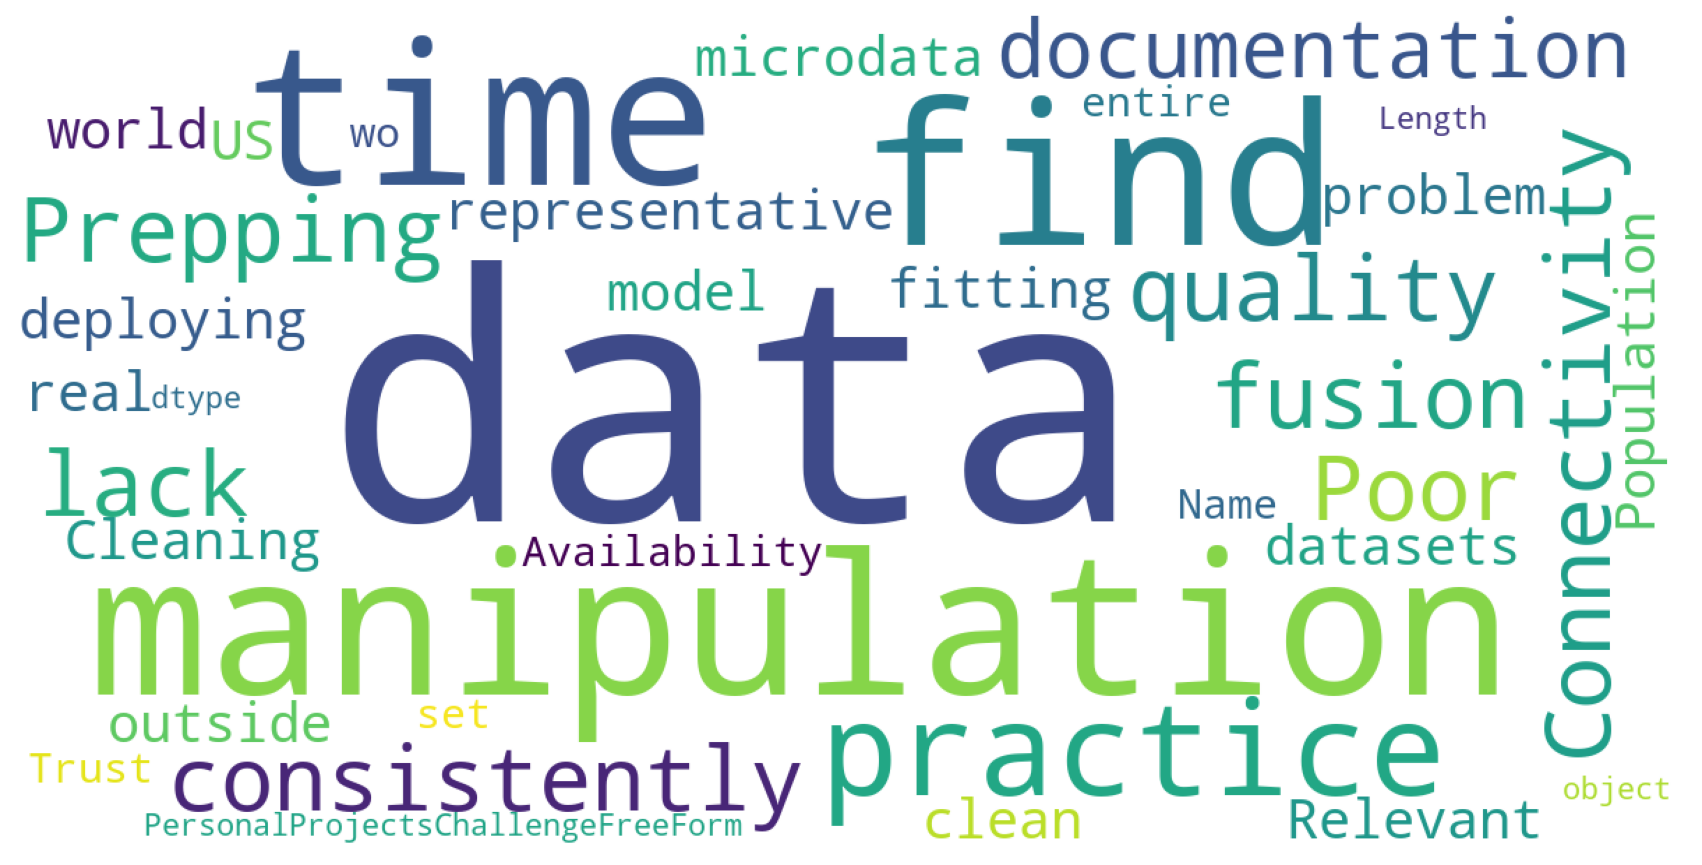

Wall time: 1.54 s


In [112]:
%time displayWordCloud(''.join(str(ppc)))

## Q10. 데이터 사이언스 업무에서 가장 많은 시간을 필요로 하는 일은? 

In [114]:
# 시간과 관련된 질문항목을 찾습니다. 
# 컬럼명이 "Time"을 포함하는 컬럼을 가져와 담습니다. 
time_features =[x for x in mcq.columns if x.find('Time') != -1]
time_features

# 이중 5번째 ~ 10번째 까지만 우리가 원하는 항목이다. 

['LearningDataScienceTime',
 'TimeSpentStudying',
 'EmployerMLTime',
 'WorkMethodsFrequencyTimeSeriesAnalysis',
 'TimeGatheringData',
 'TimeModelBuilding',
 'TimeProduction',
 'TimeVisualizing',
 'TimeFindingInsights',
 'TimeOtherSelect',
 'JobHuntTime']

In [115]:
time_features =[x for x in mcq.columns if x.find('Time') != -1][4:10]
time_features

['TimeGatheringData',
 'TimeModelBuilding',
 'TimeProduction',
 'TimeVisualizing',
 'TimeFindingInsights',
 'TimeOtherSelect']

In [117]:
# 우선 한 항목의 데이터 구조부터 살펴보자 
mcq["TimeGatheringData"].head(20)
# 데이터의 모습이 주로 0~ 100 까지의 점수로 표현되는 소수형(float)이며 
# 다수의 결측치를 포함하는것을 볼 수 있다. 

0      0.0
1      NaN
2      NaN
3     50.0
4     30.0
5     60.0
6     30.0
7      NaN
8     60.0
9     40.0
10     NaN
11    30.0
12     NaN
13     NaN
14    35.0
15    40.0
16     NaN
17     NaN
18     NaN
19     NaN
Name: TimeGatheringData, dtype: float64

In [118]:
# 자료의 특성상 각 컬럼의 평균점수를 구해야한다.

tdf = {}
for feature in time_features:
    tdf[feature[len("Time"):]] = mcq[feature].mean()
tdf = pd.Series(tdf)
tdf

GatheringData      36.144754
ModelBuilding      21.268066
Production         10.806372
Visualizing        13.869372
FindingInsights    13.094776
OtherSelect         2.396247
dtype: float64

([<matplotlib.patches.Wedge at 0x18ee26bc4c0>,
 [Text(0.43555226337668185, 1.0100961468431853, ''),
  Text(-1.0907907498413765, 0.14204062820365215, ''),
  Text(-0.6810506940304238, -0.8638112943002529, ''),
  Text(0.13910314284638017, -1.0911692424414554, ''),
  Text(0.9225825163690516, -0.5990338057990959, ''),
  Text(1.0967281779579352, -0.08477796690808154, '')])

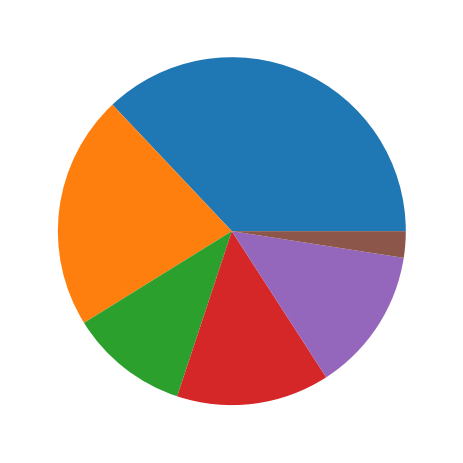

In [119]:
# 위에서 구한 시리즈형 데이터를 시각화합니다. 
plt.pie(tdf)
# 밑의 결과는 옵션 없는 깡통 

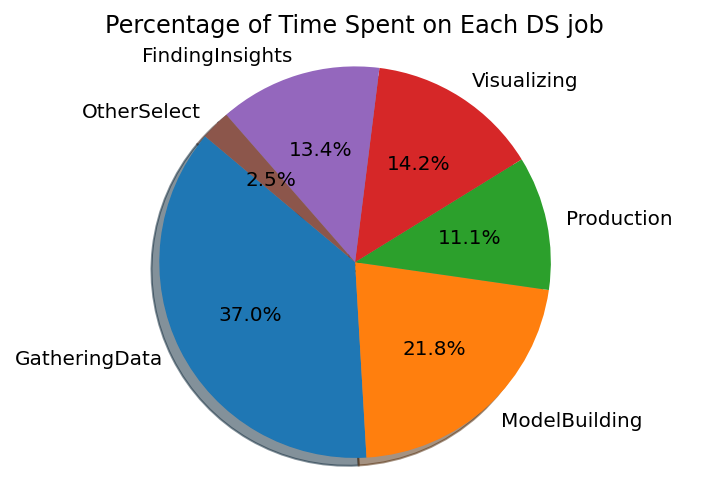

In [129]:
plt.pie(tdf, labels=tdf.index, autopct='%1.1f%%',
       shadow=True,
       startangle=140)
# labels = 옵션은 원 주위에 있는 각 항목의 이름을 표시 
# autopct='%1.1f%%' 옵션은 원 내부의 소수점 퍼센트로 표현한 비율을 표시
# shadow=True 옵션은 원 주위의 그림자 활성화 

plt.axis('equal')
plt.title("Percentage of Time Spent on Each DS job")
plt.show()  # --> 차트만 보여주는 옵션 

데이터를 수집하는 일이 37%로 업무의 가장 큰 비중을 차지하고 그 다음으로 모델을 구축하고 시각화, 인사이트를 찾는 순이다.

## Q11. 데이터 사이언스 직업을 찾는데 가장 고려해야 할 요소는 무엇일까요? 

In [134]:
# 설문 내용과 누구에게 물어봤는지 찾아봄 
qc = question.loc[question["Column"].str.contains("JobFactor")]
print(qc.shape)
qc

(16, 3)


,Column,Question,Asked
274,JobFactorLearning,How are you assessing potential job opportunit...,Learners
275,JobFactorSalary,How are you assessing potential job opportunit...,Learners
276,JobFactorOffice,How are you assessing potential job opportunit...,Learners
277,JobFactorLanguages,How are you assessing potential job opportunit...,Learners
278,JobFactorCommute,How are you assessing potential job opportunit...,Learners
279,JobFactorManagement,How are you assessing potential job opportunit...,Learners
280,JobFactorExperienceLevel,How are you assessing potential job opportunit...,Learners
281,JobFactorDepartment,How are you assessing potential job opportunit...,Learners
282,JobFactorTitle,How are you assessing potential job opportunit...,Learners
283,JobFactorCompanyFunding,How are you assessing potential job opportunit...,Learners


In [135]:
# 위의 데이터프레임에서 
# 질문내용만을 선제적으로 살펴보기 위한 검색 
qc.Question.values

array(['How are you assessing potential job opportunities? - Opportunities for professional development',
       'How are you assessing potential job opportunities? - The compensation and benefits offered',
       "How are you assessing potential job opportunities? - The office environment I'd be working in",
       "How are you assessing potential job opportunities? - The languages, frameworks, and other technologies I'd be working with",
       "How are you assessing potential job opportunities? - The amount of time I'd have to spend commuting",
       'How are you assessing potential job opportunities? - How projects are managed at the company or organization',
       'How are you assessing potential job opportunities? - The experience level called for in the job description',
       "How are you assessing potential job opportunities? - The specific department or team I'd be working on",
       "How are you assessing potential job opportunities? - The specific role or job title I'd 

In [138]:
# 설문 내용에서, jobfactor 항목이 들어있는 데이터를 담는다. 
job_factor = [x for x in mcq.columns if x.find("JobFactor") != -1]
job_factor

['JobFactorLearning',
 'JobFactorSalary',
 'JobFactorOffice',
 'JobFactorLanguages',
 'JobFactorCommute',
 'JobFactorManagement',
 'JobFactorExperienceLevel',
 'JobFactorDepartment',
 'JobFactorTitle',
 'JobFactorCompanyFunding',
 'JobFactorImpact',
 'JobFactorRemote',
 'JobFactorIndustry',
 'JobFactorLeaderReputation',
 'JobFactorDiversity',
 'JobFactorPublishingOpportunity']

In [141]:
# 우선 위의 질문 특성상 여러가지 항목에 점수를 각각 부여한것 같은데 
# 질문 하나만 꺼내서 다시 보자 
mcq["JobFactorLearning"].head(20)

# 결과 보니 --> 매우중요/다소 중요 / ... 형식인것 같다 
# 각 컬럼별로 선택된 중요도의 빈도를 계산하고 
# 이를 히트맵으로 표현하는게 좋을것 같다 


0                    NaN
1                    NaN
2         Very Important
3                    NaN
4                    NaN
5                    NaN
6                    NaN
7         Very Important
8                    NaN
9                    NaN
10        Very Important
11                   NaN
12    Somewhat important
13                   NaN
14                   NaN
15                   NaN
16                   NaN
17                   NaN
18        Very Important
19    Somewhat important
Name: JobFactorLearning, dtype: object

In [142]:
# 각 컬럼별 점수항목 비율 계산 

jfdf ={} # 계산결과를 담을 딕셔너리 자료구조 선언 

for feature in job_factor:  # 각 컬럼의 자료를 받아와서 
    a = mcq[feature].value_counts() # 한 컬럼내의 답변에 대한 빈도수 계산후 
    a = a/a.sum() # 컬럼내 자료의 전체 합 중(결측제외), 비중을 구해 담아둔다. 
    jfdf[feature[len("jobfactor"):]] = a # 컬럼명에서 "jobfactor"을 제외한 나머지 부분의 이름을 key로 각각의 계산값을 value로 갖는 딕셔너리 내부 한개의 배열을 선언 
jfdf
# 반환구조 : 딕셔너리형 --> 데이터프레임으로 전환 요 

{'Learning': Very Important        0.723177
 Somewhat important    0.252323
 Not important         0.024500
 Name: JobFactorLearning, dtype: float64,
 'Salary': Somewhat important    0.488953
 Very Important        0.461119
 Not important         0.049928
 Name: JobFactorSalary, dtype: float64,
 'Office': Very Important        0.533449
 Somewhat important    0.405998
 Not important         0.060554
 Name: JobFactorOffice, dtype: float64,
 'Languages': Very Important        0.485468
 Somewhat important    0.443165
 Not important         0.071367
 Name: JobFactorLanguages, dtype: float64,
 'Commute': Somewhat important    0.522193
 Very Important        0.345518
 Not important         0.132289
 Name: JobFactorCommute, dtype: float64,
 'Management': Somewhat important    0.466511
 Very Important        0.443506
 Not important         0.089983
 Name: JobFactorManagement, dtype: float64,
 'ExperienceLevel': Somewhat important    0.494908
 Very Important        0.412860
 Not important       

In [145]:
# 데이터프레임 전환 
jfdf = pd.DataFrame(jfdf) 
jfdf
# 그대로 히트맵에 넣으면 모양이 이상할것 같다 
# 친숙한 형태로 만들기 위해 전치하자 

jfdf = jfdf.transpose()
jfdf

,Not important,Somewhat important,Very Important
Learning,0.024500,0.252323,0.723177
Salary,0.049928,0.488953,0.461119
Office,0.060554,0.405998,0.533449
Languages,0.071367,0.443165,0.485468
Commute,0.132289,0.522193,0.345518
Management,0.089983,0.466511,0.443506
ExperienceLevel,0.092232,0.494908,0.412860
Department,0.165105,0.482728,0.352166
Title,0.149971,0.444640,0.405390
CompanyFunding,0.149809,0.562298,0.287892


<AxesSubplot:>

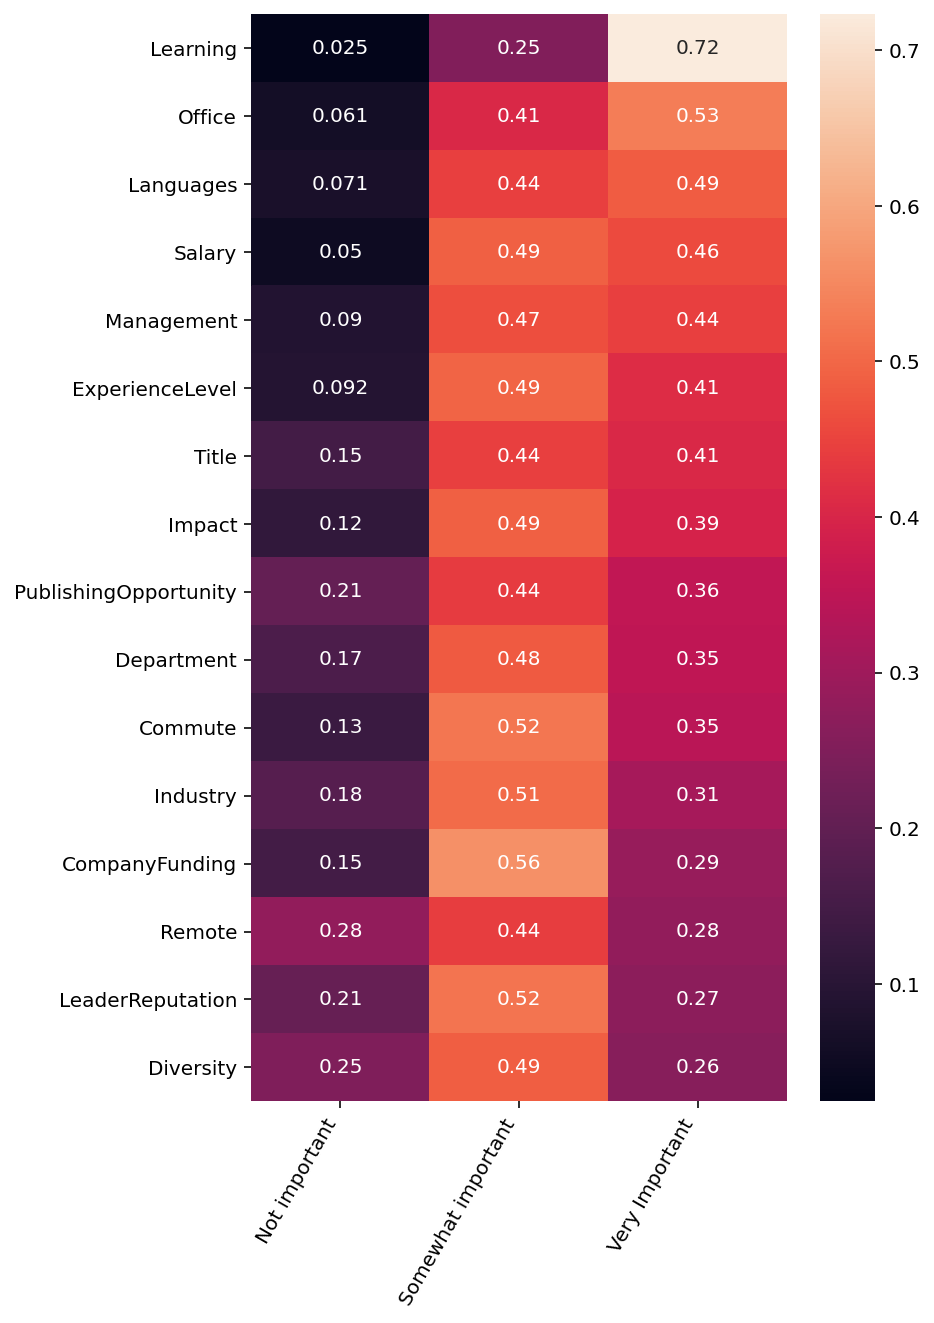

In [147]:
# 히트맵 작성 
# warning !! : 히트맵은 작성전에 자료를 모두 정렬해야함 
# 따라서 very important를 기준으로 내림차순 정렬함 
plt.figure(figsize=(6,10))
plt.xticks(rotation =60, ha='right')
sns.heatmap(data=jfdf.sort_values("Very Important",ascending=False),
           annot=True)

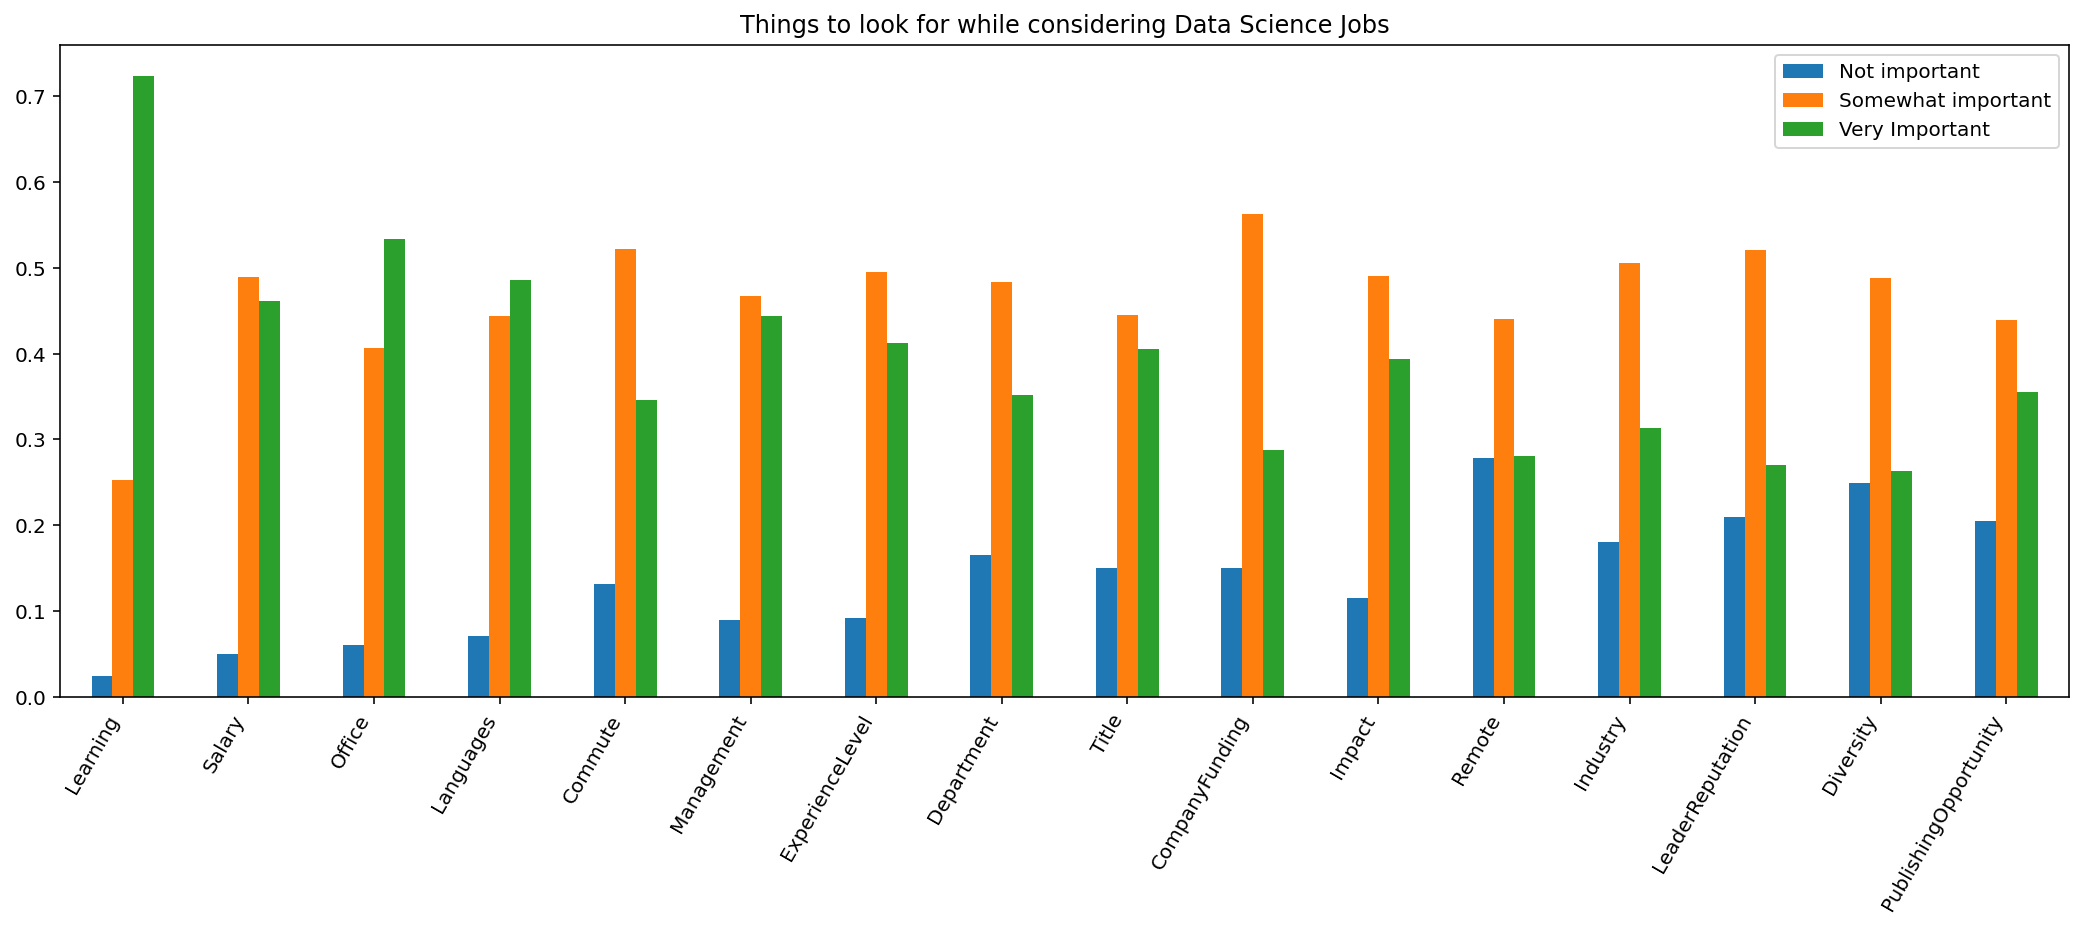

In [148]:
# 이번에는 각 항목별로 점수대의 분포를 보기 위해 막대그프로 그려보자 
jfdf.plot(kind='bar',figsize = (18,6),
         title = "Things to look for while considering Data Science Jobs")

# X축 레이블의 형태 고정 
plt.xticks(rotation =60, ha='right')
plt.show()

데이터 사이언티스트로 직업을 찾을 때 가장 고려할 요소는 배울 수 있는 곳인지, 사무실 근무환경, 프레임워크나 언어, 급여, 경영상태, 경력정도 순이다.

## Q12. 데이터 사이언티스트가 되기 위해 학위가 중요할까요?

<AxesSubplot:xlabel='count', ylabel='UniversityImportance'>

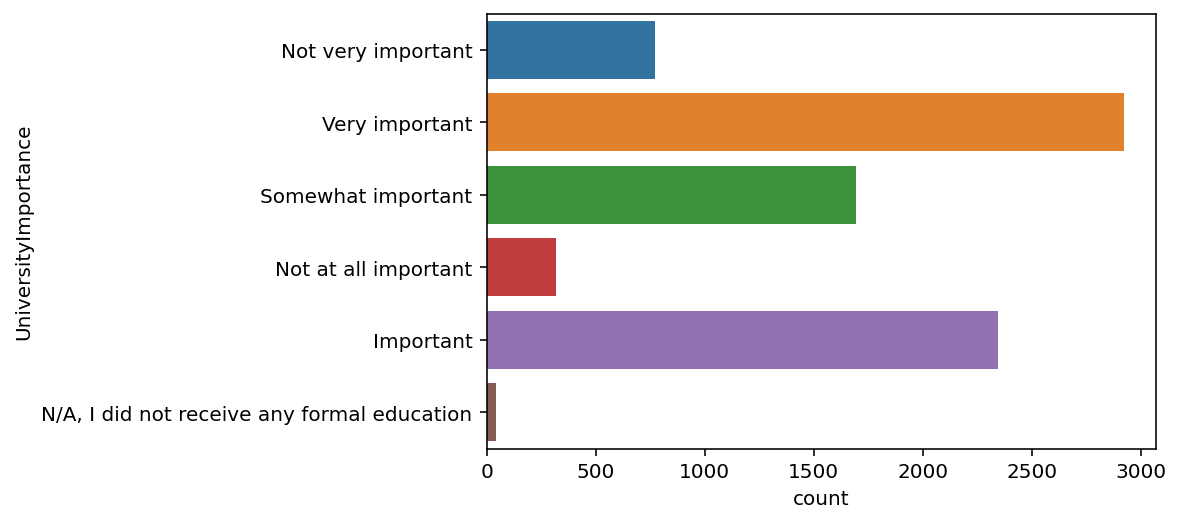

In [149]:
sns.countplot(data=mcq, y='UniversityImportance')

In [151]:
# 플로리 라는 라이브러리를 활용한 시각화
# import plotly.offline as py
# py.init_notebook_mode(connected=True)
# import plotly.figure_factory as fig_fact

# top_uni = mcq['UniversityImportance'].value_counts().head(5)
# top_uni_dist = []
# for uni in top_uni.index:
#     top_uni_dist.append(
#         mcq[(mcq['Age'].notnull()) & \
#             (mcq['UniversityImportance'] == uni)]['Age'])

# group_labels = top_uni.index

# fig = fig_fact.create_distplot(top_uni_dist,group_labels)
# py.iplot(fig, filename='University Importance by Age')

ModuleNotFoundError: No module named 'plotly.validators.layout.xaxis'

{결과 그래프는 영상 참고}

마치 연령대 그래프를 찍어 본것과 같은 형태의 그래프다. 20~30대는 대학 학위가 매우 중요하다고 생각하며, 연령대가 높은 응답자들은 그다지 중요하지 않다고 응답했다. 300명 미만의 응답자만이 학위가 중요하지 않다고 생각한다.

대부분의 응답자가 석사와 박사인 것을 고려해 봤을 때 이는 자연스러운 응답이다.



## Q13. 어디서부터 데이터사이언스를 시작해야 할까요? 

In [156]:
print(mcq[mcq["FirstTrainingSelect"].notnull()].shape)
mcq[mcq["FirstTrainingSelect"].notnull()]["FirstTrainingSelect"]

(14712, 228)


0                                 University courses
1                                 University courses
2                                 University courses
3                                 University courses
4                                 University courses
                            ...                     
16705                                    Self-taught
16706                                    Self-taught
16709    Online courses (coursera, udemy, edx, etc.)
16711                             University courses
16712    Online courses (coursera, udemy, edx, etc.)
Name: FirstTrainingSelect, Length: 14712, dtype: object

<AxesSubplot:xlabel='count', ylabel='FirstTrainingSelect'>

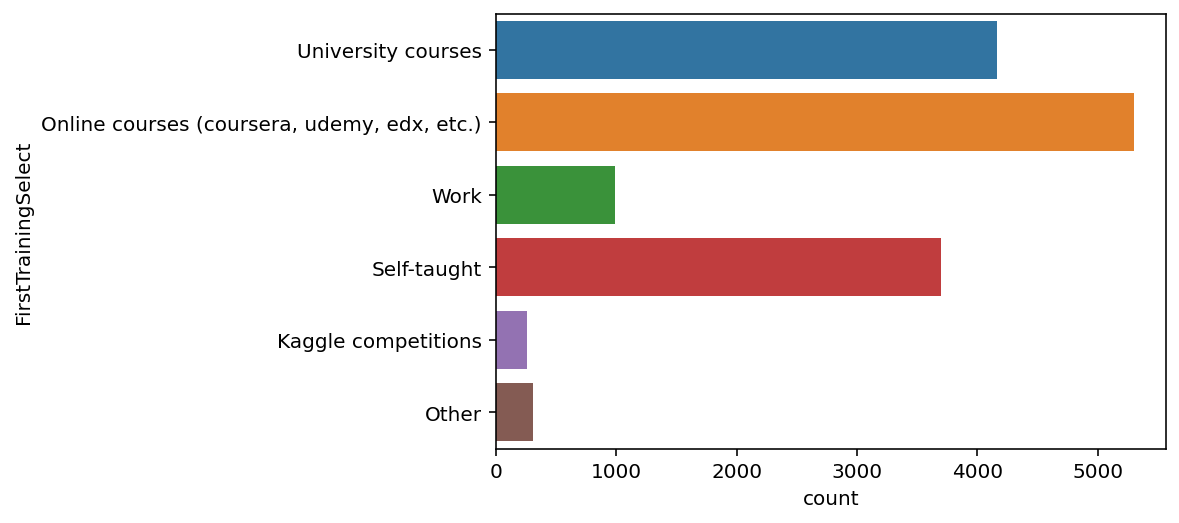

In [155]:
# seaborn의 countplot을 활용한 시각화 도전! 
sns.countplot(y="FirstTrainingSelect", data=mcq)

머신러닝과 관련 된 직무경험이 가장 중요하고 다음으로 캐글 경진대회의 결과가 중요하다고 답했다. 그리고 온라인 강좌의 수료증이나 깃헙 포트폴리오 순으로 중요하다고 답했다.

## Q14. 데이터사이언티스트 이력서에서 가장 중요한것은 무엇일까요?

<AxesSubplot:xlabel='count', ylabel='ProveKnowledgeSelect'>

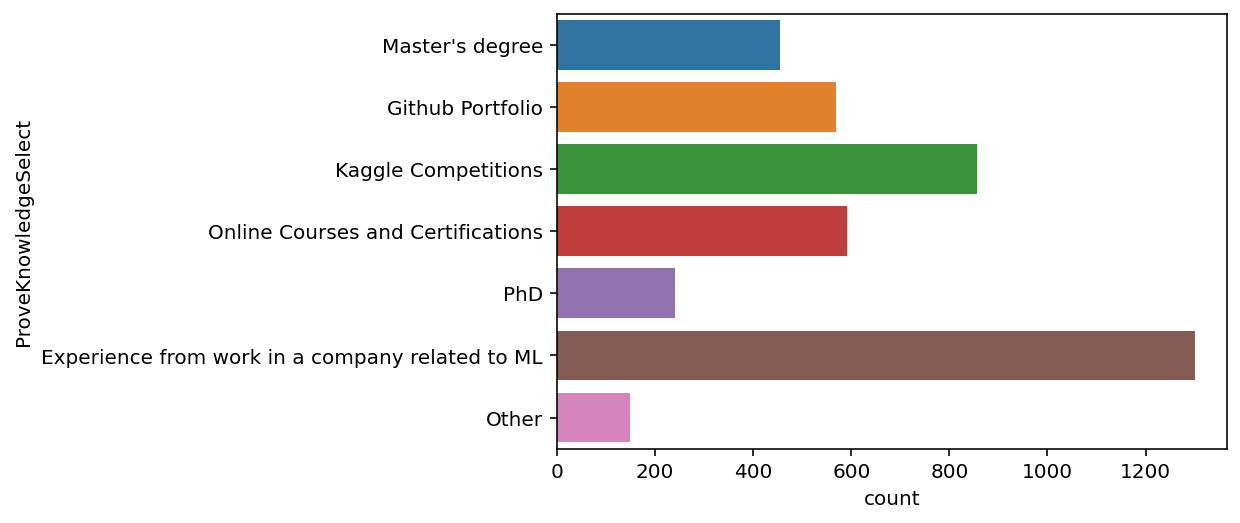

In [157]:
sns.countplot(y="ProveKnowledgeSelect", data=mcq)

## Q15. 머신러닝 알고리즘을 사용하기 위해 수학이 필요할까?

* scikit과 같은 라이브러리는 세부 정보를 추상화하여 기본기술을 몰라도 ML 모델을 프로그래밍 할 수 있다. 그럼에도 그 안에 있는 수학을 아는 것이 중요할까?

In [159]:
# 설문내용과 누구에게 물어봤는지를 찾아봄 
qc = question.loc[question["Column"].str.contains("AlgorithmUnderstandingLevel")]
qc

,Column,Question,Asked
227,AlgorithmUnderstandingLevel,At which level do you understand the mathemati...,CodingWorker


In [161]:
# 실제 자료에서 해당 질문에 대한 답변 데이터를 받아봅니다. 
print(mcq[mcq["AlgorithmUnderstandingLevel"].notnull()].shape)
mcq[mcq["AlgorithmUnderstandingLevel"].notnull()]["AlgorithmUnderstandingLevel"]

(7410, 228)


0        Enough to explain the algorithm to someone non...
3           Enough to refine and innovate on the algorithm
4           Enough to refine and innovate on the algorithm
5        Enough to explain the algorithm to someone non...
6        Enough to explain the algorithm to someone non...
                               ...                        
16692    Enough to explain the algorithm to someone non...
16694    Enough to code it again from scratch, albeit i...
16700            Enough to run the code / standard library
16702    Enough to explain the algorithm to someone non...
16712               Enough to tune the parameters properly
Name: AlgorithmUnderstandingLevel, Length: 7410, dtype: object

<AxesSubplot:xlabel='count', ylabel='AlgorithmUnderstandingLevel'>

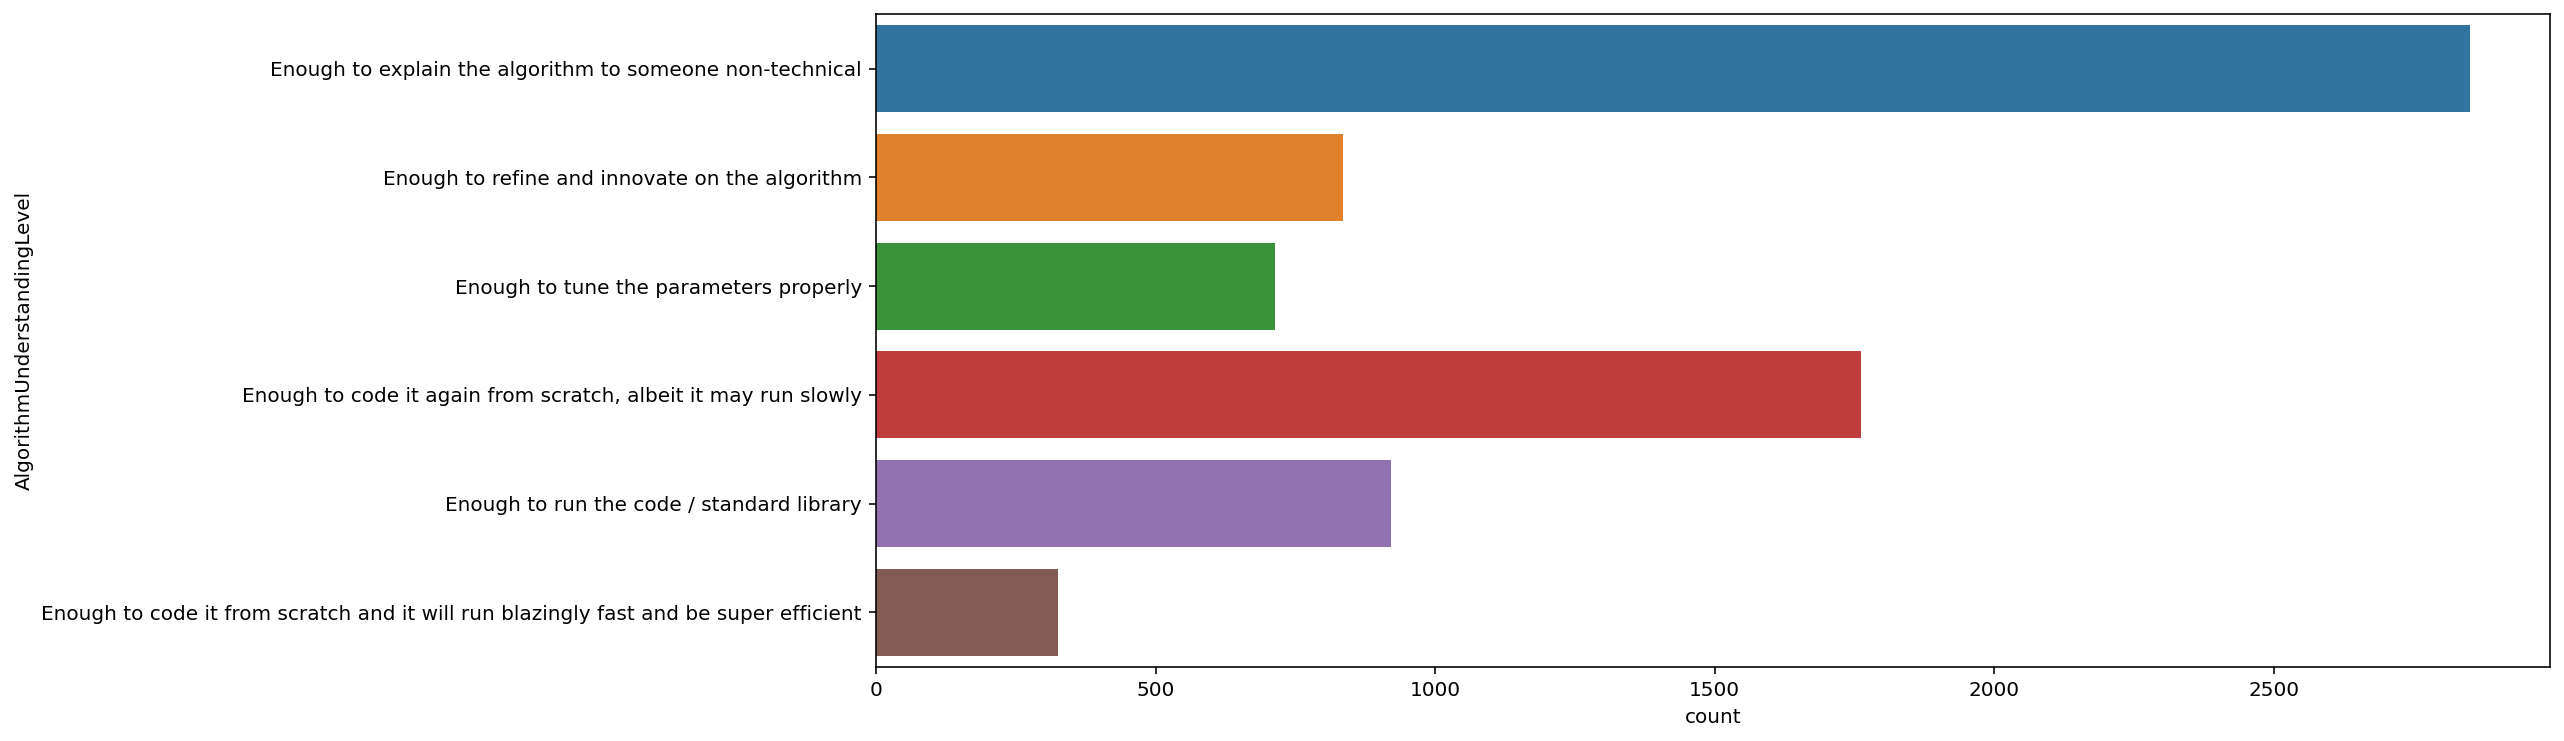

In [163]:
plt.figure(figsize=(15,6))
sns.countplot(y="AlgorithmUnderstandingLevel", data=mcq)

현재 코딩업무를 하는 사람들에게 질문했으며, 기술과 관련 없는 사람에게 설명할 수 있는 정도라면 충분하다는 응답이 가장 많으며 좀 더디더라도 밑바닥부터 다시 코딩해 볼 수 있는 게 중요하다는 응답이 그 뒤를 잇는다.

## Q16. 어디에서 일을 찾아야 할까요?

In [164]:
# 관련 질문탐색 
# 설문내용과 누구에게 물어봤는지 찾아봄 
question.loc[question["Column"].str.contains("JobSearchResource|EmployerSearchMethod")]

,Column,Question,Asked
108,EmployerSearchMethod,How did you find your current job? - Selected ...,CodingWorker-NC
109,EmployerSearchMethodOtherFreeForm,How did you find your current job? - Some othe...,CodingWorker-NC
271,JobSearchResource,Which resource has been the best for finding d...,Learners
272,JobSearchResourceFreeForm,Which resource has been the best for finding d...,Learners


In [165]:
# 위의 자료 중, jobsearchresource에 있는 데이터를 봅니다. 
mcq["JobSearchResource"]

0                                                      NaN
1                                                      NaN
2        Asking friends, family members, or former coll...
3                                                      NaN
4                                                      NaN
                               ...                        
16711                                                  NaN
16712                                                  NaN
16713                                                  NaN
16714                                                  NaN
16715                                                  NaN
Name: JobSearchResource, Length: 16716, dtype: object

<AxesSubplot:title={'center':'Best Places to look for a Data Science Job'}, xlabel='count', ylabel='JobSearchResource'>

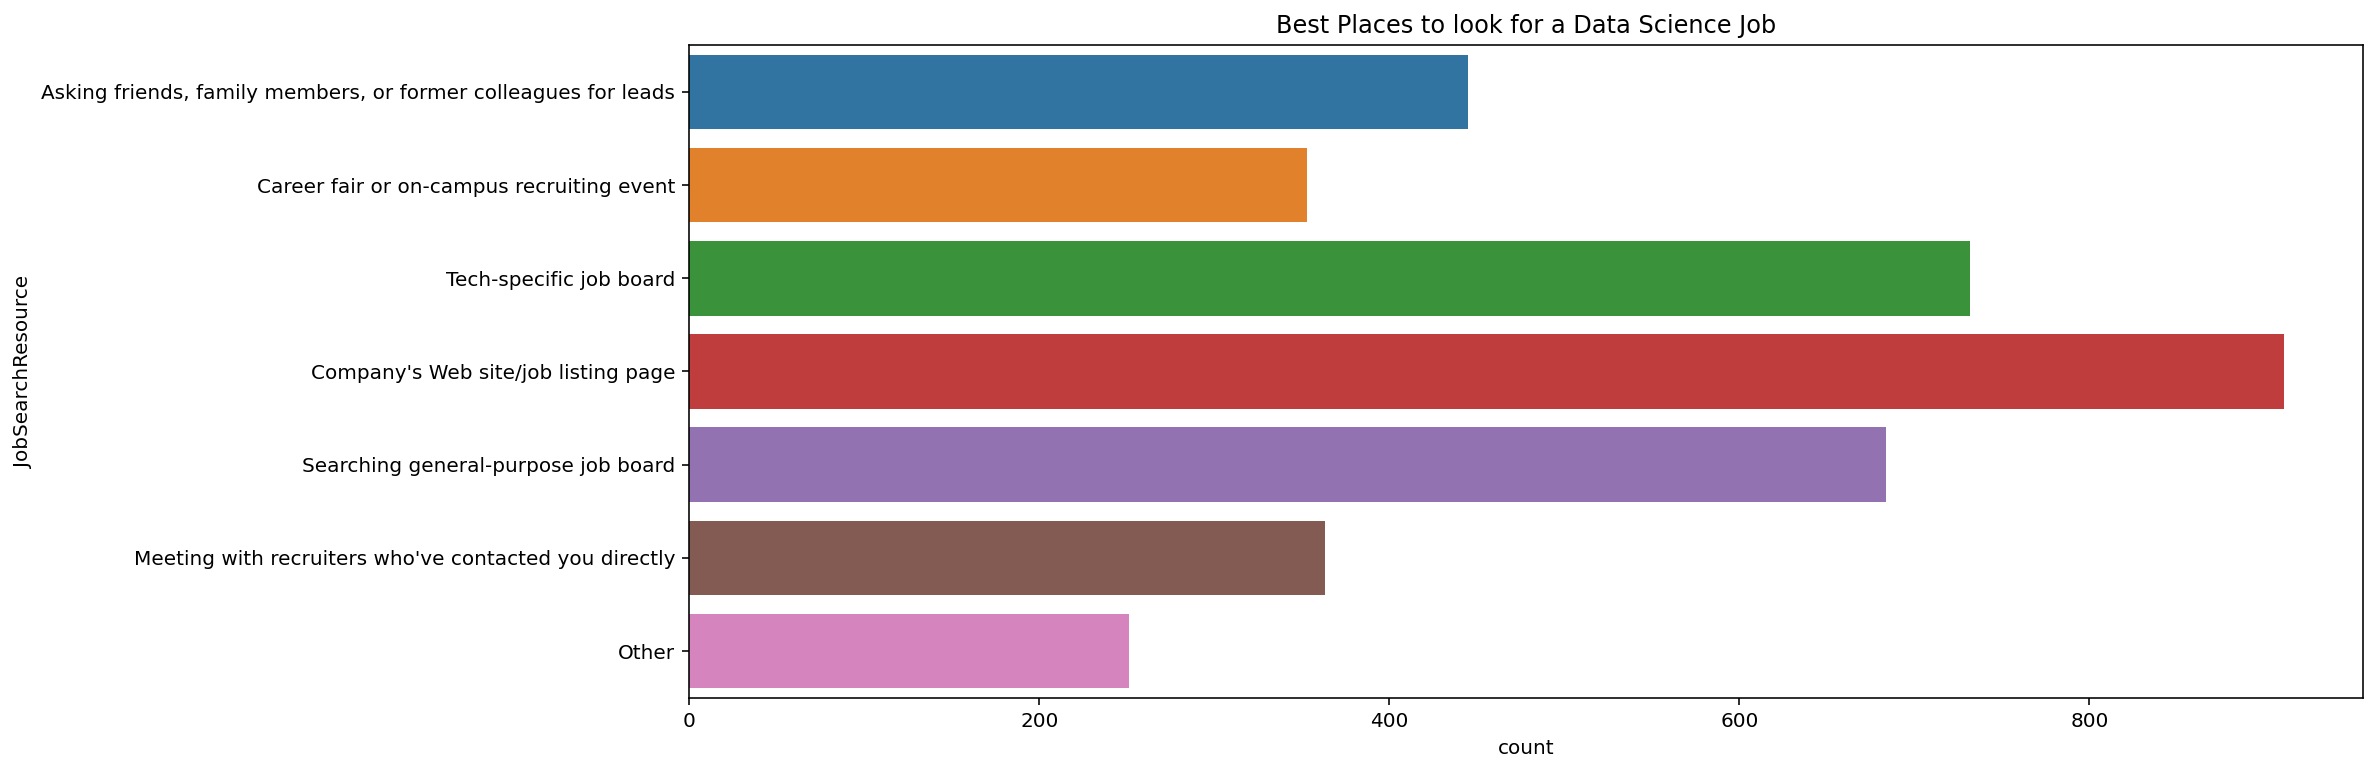

In [170]:
# 시각화합니다. 
plt.figure(figsize =(15,6))
plt.title("Best Places to look for a Data Science Job")
sns.countplot(data=mcq, y="JobSearchResource")

구직자들은 회사 웹사이트나 구직 사이트로부터 찾고 그 다음으로 특정 기술의 채용 게시판, 일반 채용 게시판, 친구나 가족, 이전 직장 동료나 리더를 통해 채용 정보를 얻는다.


<AxesSubplot:title={'center':'Top Places to get Data Science Jobs'}, xlabel='count', ylabel='EmployerSearchMethod'>

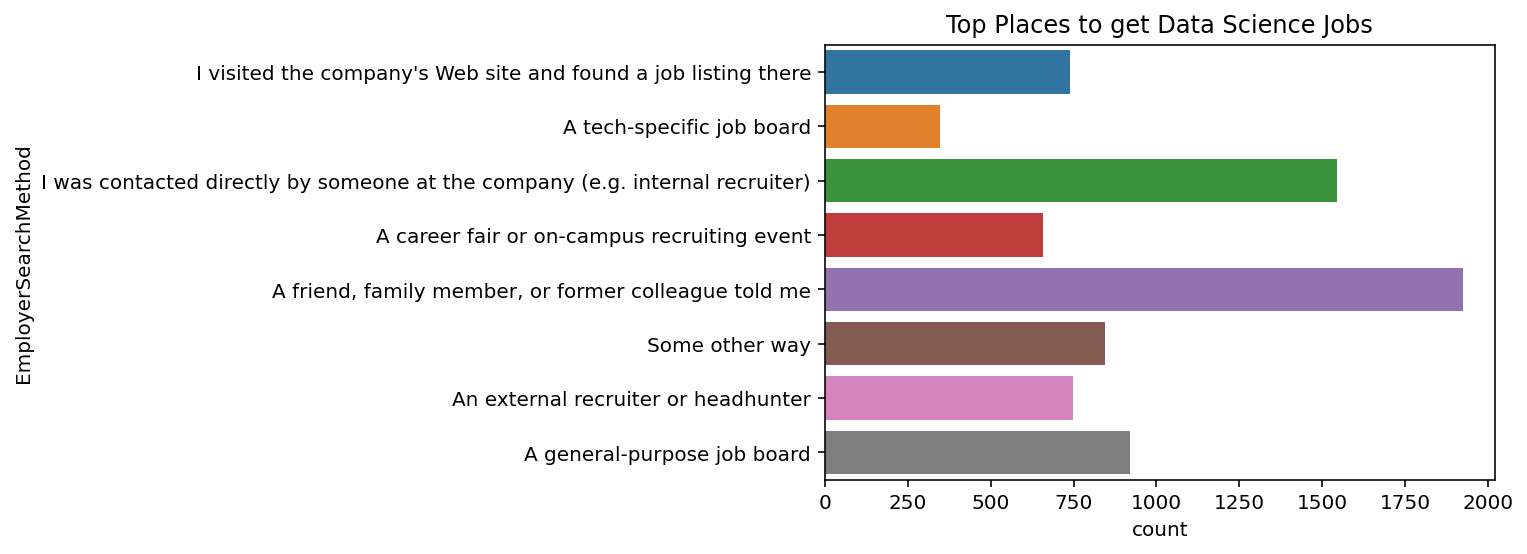

In [171]:
plt.title("Top Places to get Data Science Jobs")
sns.countplot(y='EmployerSearchMethod', data=mcq)

위에서 구직자는 주로 구직사이트로 부터 채용정보를 가장 많이 찾았으나, 채용자는 친구, 가족, 이전 직장 동료 등의 추천을 통해 가장 많이 사람을 구하며 다음으로 리쿠르터나 특정 회사에 소속 된 사람에게 직접 연락을 해서 구하는 비율이 높다.

### 그럼 한국사람의 경우는 어떨까?

<AxesSubplot:title={'center':'Best Places to look for a Data Science Job'}, xlabel='count', ylabel='JobSearchResource'>

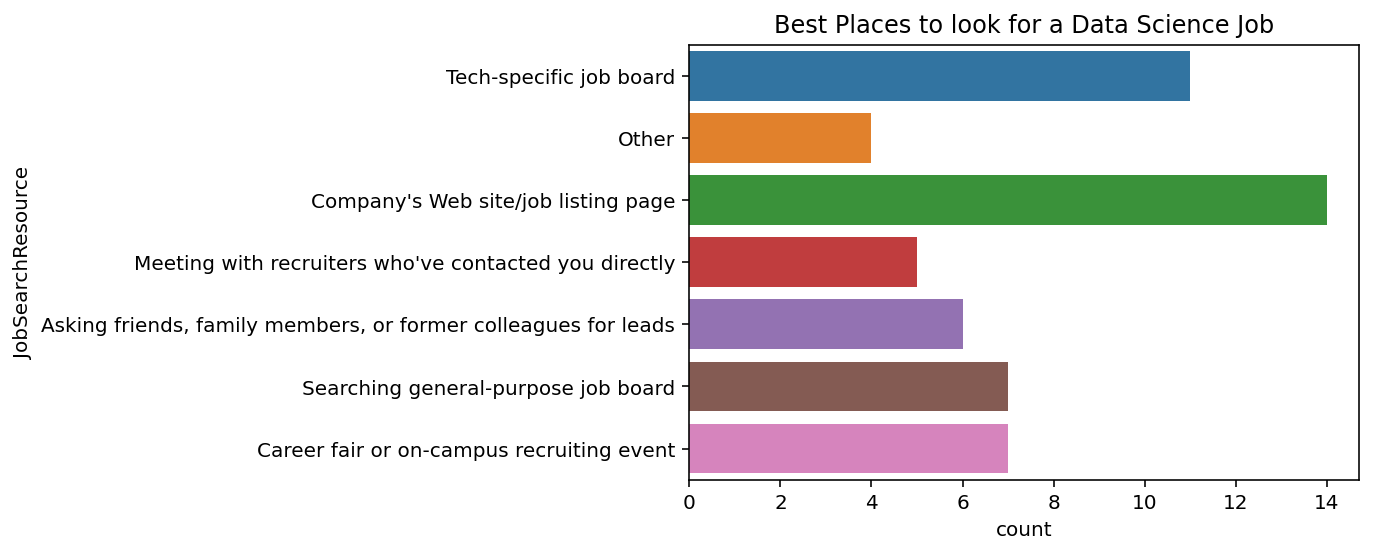

In [172]:
korea = mcq.loc[(mcq['Country']=='South Korea')]
plt.title("Best Places to look for a Data Science Job")
sns.countplot(y='JobSearchResource', data=korea)

<AxesSubplot:title={'center':'Top Places to get Data Science Jobs'}, xlabel='count', ylabel='EmployerSearchMethod'>

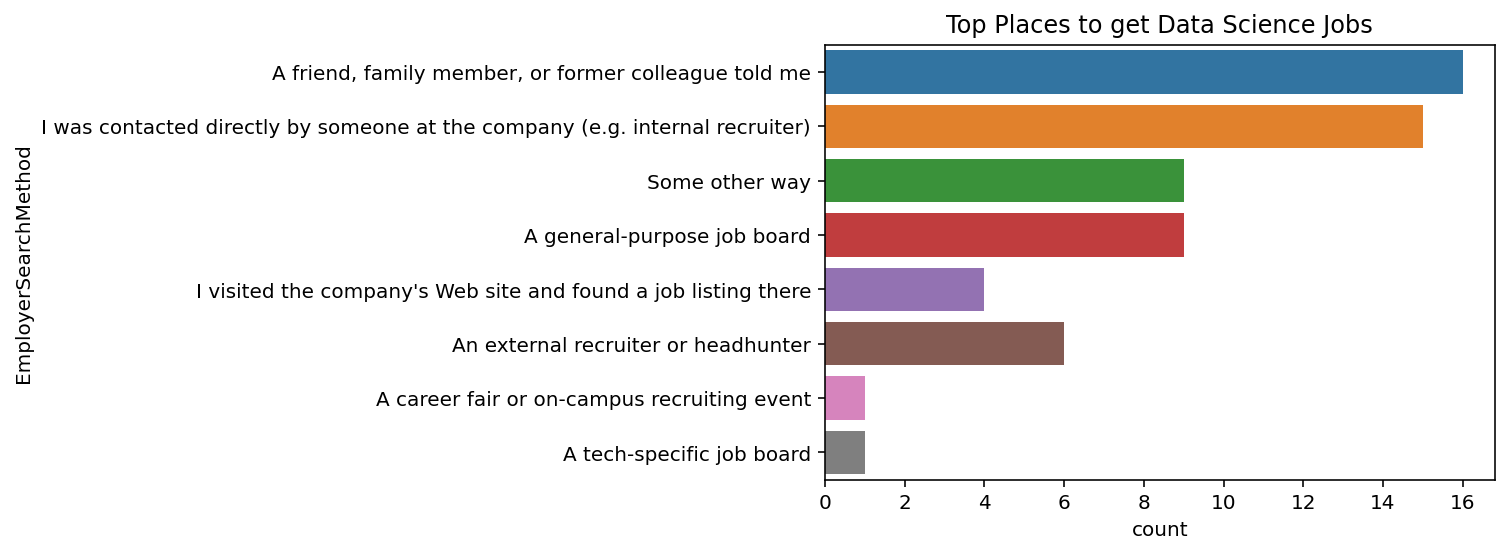

In [173]:
plt.title("Top Places to get Data Science Jobs")
sns.countplot(y='EmployerSearchMethod', data=korea)

# 결론
* 이 설문결과로 Python이 R보다 훨씬 많이 사용됨을 알 수 있었다.
* 하지만 Python과 R을 모두 사용하는 사람도 많다.
* 데이터 수집과 정제는 어려운 일이다.(공감)
* 인기있는 학습플랫폼과 블로그, 유튜브 채널, 팟캐스트 등을 알게 되었다.
* 내년에 인기있는 기술로는 딥러닝과 텐서플로우가 큰 차지를 할 것이다.